# LendingClub data analysis

<h2>Imports</h2>

In [125]:
from enum import Enum, auto
from typing import Callable, Tuple, TypeVar
from matplotlib.pyplot import axis, show, title, xlabel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [126]:
sns.__version__


'0.11.0'

**Must be 0.11.0**

<h2>Data load</h2>

In [127]:

loanDf = pd.read_csv("loan.csv", encoding='ISO-8859-1')

<h3>Global variables/ options</h3>

In [128]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 5000


<h3>Data understanding</h3>

In [129]:
loanDf.shape

(39717, 111)

In [130]:
loanDf.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [131]:
loanDf.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [132]:
loanDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<h4> We can divide columns into 3 categories</h4>
- Applicant information
- Loan Information
- User behavior

In [133]:
loanDf.dtypes


id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

**Except just by seeing that many rows have above 50 columns null, we don't get any information**

In [134]:
loanDf.isnull().sum(axis=1).describe()


count    39717.000000
mean        56.987285
std          0.824036
min         54.000000
25%         56.000000
50%         57.000000
75%         57.000000
max         62.000000
dtype: float64

<h3>Target Column : loan_status</h3>

<h3>We'll drop all Current Running loans as they caanot be used for analysis, because we cannot make decision(currently) if they are going to be fully paid or defaulted</h3>

In [135]:
display(loanDf.shape)
loanDf = loanDf[loanDf['loan_status'] != 'Current']
display(loanDf.shape)

(39717, 111)

(38577, 111)

<h3>Prepare target Column</h3>

In [136]:
loanDf['loan_status'] = loanDf['loan_status'].apply(
    lambda ls: 1 if ls == 'Charged Off' else 0)



<h2>Data Cleaning</h2>

In [137]:
loanDf.isnull().any()

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                          True
emp_length                         True
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                               True
purpose                           False
title                              True
zip_code                          False
addr_state                        False
dti                               False


In [138]:
loanDf.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [139]:
loanDf.isnull().sum(axis=1)


0        58
1        57
2        59
3        56
5        58
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 38577, dtype: int64

<h4>Get the percentage of missing values in each column</h4>

In [140]:
null_percent = round(100*(loanDf.isnull().sum()/len(loanDf.index)), 2)
null_percent

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.68
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.47
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

**Columns with more than 60% nulls**

In [141]:
null_percent[null_percent > 60]


mths_since_last_delinq             64.56
mths_since_last_record             92.90
next_pymnt_d                      100.00
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

**We'll drop these columns as they are part user behavior and almost all nulls**

In [142]:
columns_toRemove = null_percent.loc[null_percent > 60].index
columns_toRemove


Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

 #### Let us remove the columns having all missing values greater than 70 Percent

In [143]:
filtered_df = loanDf.drop(columns_toRemove, axis=1)



In [144]:
filtered_df.shape


(38577, 54)

 ##### Let us now deal with other missing values within the remaining data

In [145]:
moreMissingCols = round(
    100*(filtered_df.isnull().sum()/len(filtered_df.index)), 2).sort_values(ascending=False)
moreMissingCols[moreMissingCols > 0]



desc                          32.47
emp_title                      6.19
emp_length                     2.68
pub_rec_bankruptcies           1.81
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.15
collections_12_mths_ex_med     0.15
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

**We'll drop below mentioned columns because either they are part of user behavior or very less informative for EDA**

In [146]:
filtered_df = filtered_df.drop(['desc', 'collections_12_mths_ex_med', 'total_rec_int', 'total_pymnt',
                                'chargeoff_within_12_mths', 'tax_liens', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'recoveries', 'collection_recovery_fee', 'total_rec_late_fee', 'total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt', 'delinq_2yrs'], axis=1)



In [147]:
moreMissingCols = round(
    100*(filtered_df.isnull().sum()/len(filtered_df.index)), 2).sort_values(ascending=False)
moreMissingCols[moreMissingCols > 0]


emp_title       6.19
emp_length      2.68
last_pymnt_d    0.18
revol_util      0.13
title           0.03
dtype: float64

<h3>Columns which could be imputed</h3>
| Column Name | Imputation Technique | Reason |
|-|-|-|
| title | mode |Categorical |
| emp_title | mode |Categorical |
| emp_length | mode |We are considering as categorical, could be mean as there are no outliers |
| last_pymnt_d | TBD |Depends on business decision |
| revol_util | mean  or median|  based on data data distribution or business decision  |

# but we'll drop the missing values rows because removal of these very less rows will not impact statistical analysis

In [148]:
for c in ['title', 'emp_title', 'emp_length', 'last_pymnt_d', 'revol_util']:
    filtered_df = filtered_df[~filtered_df[c].isnull()]

In [149]:

moreMissingCols = round(
    100*(filtered_df.isnull().sum()/len(filtered_df.index)), 2).sort_values(ascending=False)
moreMissingCols[moreMissingCols > 0]


Series([], dtype: float64)

 ## We have Non null data now

In [150]:
filtered_df.to_csv('non_null_loans.csv', encoding='utf-8', index=False)


In [151]:
cleanDf: pd.DataFrame = pd.read_csv('non_null_loans.csv', encoding='utf-8')

**unique value counts**

In [152]:
unique_value_counts = cleanDf.nunique().sort_values()
unique_value_counts

delinq_amnt                1
application_type           1
policy_code                1
out_prncp_inv              1
out_prncp                  1
initial_list_status        1
acc_now_delinq             1
pymnt_plan                 1
term                       2
loan_status                2
verification_status        3
pub_rec                    5
home_ownership             5
grade                      7
inq_last_6mths             9
emp_length                11
purpose                   14
sub_grade                 35
open_acc                  40
addr_state                50
issue_d                   55
total_acc                 80
last_pymnt_d             101
int_rate                 368
earliest_cr_line         509
zip_code                 817
loan_amnt                857
funded_amnt             1007
revol_util              1081
dti                     2842
annual_inc              4893
funded_amnt_inv         7652
installment            14413
title                  18048
revol_bal     

<h3>We could see that there are many columans which have single value, we must get rid of them as they are non informative</h3>

In [153]:
unique_value_counts = cleanDf.nunique().sort_values()
colsToRemove = unique_value_counts[unique_value_counts == 1]
colsToRemove


delinq_amnt            1
application_type       1
policy_code            1
out_prncp_inv          1
out_prncp              1
initial_list_status    1
acc_now_delinq         1
pymnt_plan             1
dtype: int64

In [154]:
cleanDf = cleanDf.drop(colsToRemove.index, axis=1)

In [155]:

cleanDf.nunique().sort_values()

term                       2
loan_status                2
verification_status        3
pub_rec                    5
home_ownership             5
grade                      7
inq_last_6mths             9
emp_length                11
purpose                   14
sub_grade                 35
open_acc                  40
addr_state                50
issue_d                   55
total_acc                 80
last_pymnt_d             101
int_rate                 368
earliest_cr_line         509
zip_code                 817
loan_amnt                857
funded_amnt             1007
revol_util              1081
dti                     2842
annual_inc              4893
funded_amnt_inv         7652
installment            14413
title                  18048
revol_bal              20573
emp_title              27890
total_pymnt_inv        34103
member_id              36021
url                    36021
id                     36021
dtype: int64

<h3>Remove identity columns ie id, member_id, url</h3>

In [156]:
cleanDf.drop(['id', 'member_id', 'url'], axis=1, inplace=True)


In [157]:
cleanDf.nunique().sort_values()


loan_status                2
term                       2
verification_status        3
pub_rec                    5
home_ownership             5
grade                      7
inq_last_6mths             9
emp_length                11
purpose                   14
sub_grade                 35
open_acc                  40
addr_state                50
issue_d                   55
total_acc                 80
last_pymnt_d             101
int_rate                 368
earliest_cr_line         509
zip_code                 817
loan_amnt                857
funded_amnt             1007
revol_util              1081
dti                     2842
annual_inc              4893
funded_amnt_inv         7652
installment            14413
title                  18048
revol_bal              20573
emp_title              27890
total_pymnt_inv        34103
dtype: int64

In [158]:
cleanDf.isnull().sum().sum()


0

In [159]:
cleanDf.to_csv('loans_with_required_columns.csv',
               encoding='utf-8', index=False)


In [160]:
cleanDf = pd.read_csv('loans_with_required_columns.csv', encoding='utf-8')

In [161]:
cleanDf.shape


(36021, 29)

In [162]:
cleanDf.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       2500         2500           2500.0   60 months   15.27%        59.83   
1      10000        10000          10000.0   36 months   13.49%       339.31   
2       5000         5000           5000.0   36 months    7.90%       156.46   
3       7000         7000           7000.0   60 months   15.96%       170.08   
4       3000         3000           3000.0   36 months   18.64%       109.43   

  grade sub_grade                  emp_title emp_length home_ownership  \
0     C        C4                      Ryder   < 1 year           RENT   
1     C        C1        AIR RESOURCES BOARD  10+ years           RENT   
2     A        A4       Veolia Transportaton    3 years           RENT   
3     C        C5  Southern Star Photography    8 years           RENT   
4     E        E1            MKC Accounting     9 years           RENT   

   annual_inc verification_status issue_d  loan_status             purpose  \
0     30000.0     Source Verified  Dec-11            1                 car   
1     49200.0     Source Verified  Dec-11            0               other   
2     36000.0     Source Verified  Dec-11            0             wedding   
3     47004.0        Not Verified  Dec-11            0  debt_consolidation   
4     48000.0     Source Verified  Dec-11            0                 car   

                                   title zip_code addr_state    dti  \
0                                   bike    309xx         GA   1.00   
1                               personel    917xx         CA  20.00   
2  My wedding loan I promise to pay back    852xx         AZ  11.20   
3                                   Loan    280xx         NC  23.51   
4                        Car Downpayment    900xx         CA   5.35   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Apr-99               5         3        0       1687      9.40%   
1           Feb-96               1        10        0       5598        21%   
2           Nov-04               3         9        0       7963     28.30%   
3           Jul-05               1         7        0      17726     85.60%   
4           Jan-07               2         4        0       8221     87.50%   

   total_acc  total_pymnt_inv last_pymnt_d  
0          4          1008.71       Apr-13  
1         37         12231.89       Jan-15  
2         12          5632.21       Jan-15  
3         11         10110.84       May-16  
4          4          3939.14       Jan-15

<h3>Investigating and correct Data Types</h3>

In [163]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36021 entries, 0 to 36020
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36021 non-null  int64  
 1   funded_amnt          36021 non-null  int64  
 2   funded_amnt_inv      36021 non-null  float64
 3   term                 36021 non-null  object 
 4   int_rate             36021 non-null  object 
 5   installment          36021 non-null  float64
 6   grade                36021 non-null  object 
 7   sub_grade            36021 non-null  object 
 8   emp_title            36021 non-null  object 
 9   emp_length           36021 non-null  object 
 10  home_ownership       36021 non-null  object 
 11  annual_inc           36021 non-null  float64
 12  verification_status  36021 non-null  object 
 13  issue_d              36021 non-null  object 
 14  loan_status          36021 non-null  int64  
 15  purpose              36021 non-null 

 ### Converting month column to datetime

In [164]:
for c in ['issue_d', 'earliest_cr_line', 'last_pymnt_d']:
    cleanDf[c] = pd.to_datetime(cleanDf[c], format='%b-%y')


<h3>Fix the data types</h3>


In [165]:
T = TypeVar('T')


def cleaner(value: str, func: Callable[[str], T]) -> T:
    if value is not None:
        value = str(value).strip()
        if len(value) == 0:
            return None
        return func(value)
    return None


term_cleaner: Callable[[str], int] = lambda term: cleaner(
    term, lambda term: int(term.split()[0]))


percent_leaner: Callable[[str], float] = lambda value: cleaner(
    value, lambda int_rate: float(int_rate.strip().replace("%", '')))


def emp_length_c(emp_length: str) -> int:
    emp_length = str(emp_length)
    if emp_length.lower() == 'nan':
        return None
    if emp_length.startswith('10+'):
        return 99
    if emp_length.startswith('<'):
        return 0
    return int(emp_length.split()[0])


emp_length_cleaner: Callable[[str],
                             int] = lambda value: cleaner(value, emp_length_c)


zip_code_cleaner: Callable[[str], str] = lambda value: cleaner(
    value, lambda zip: int(value[:3]))

In [166]:

cleanDf['term'] = cleanDf['term'].apply(term_cleaner)

In [167]:
cleanDf['int_rate'] = cleanDf['int_rate'].apply(percent_leaner)

In [168]:
cleanDf['emp_length'] = cleanDf['emp_length'].apply(emp_length_cleaner)

In [169]:
cleanDf['zip_code'] = cleanDf['zip_code'].apply(zip_code_cleaner)

In [170]:
cleanDf['revol_util'] = cleanDf['revol_util'].apply(percent_leaner)


In [171]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36021 entries, 0 to 36020
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            36021 non-null  int64         
 1   funded_amnt          36021 non-null  int64         
 2   funded_amnt_inv      36021 non-null  float64       
 3   term                 36021 non-null  int64         
 4   int_rate             36021 non-null  float64       
 5   installment          36021 non-null  float64       
 6   grade                36021 non-null  object        
 7   sub_grade            36021 non-null  object        
 8   emp_title            36021 non-null  object        
 9   emp_length           36021 non-null  int64         
 10  home_ownership       36021 non-null  object        
 11  annual_inc           36021 non-null  float64       
 12  verification_status  36021 non-null  object        
 13  issue_d              36021 non-

In [172]:

cols_to_string_normalization = ['grade', 'sub_grade', 'emp_title',
                                'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state']


In [173]:


def normalize_string_values():
    for c in cols_to_string_normalization:
        cleanDf[c] = cleanDf[c].astype(str).str.upper()


In [174]:


normalize_string_values()


In [175]:
cols_to_be_categorical = cols_to_string_normalization + ['term', 'emp_length']

In [176]:


def normalize_categorical_values():
    for c in cols_to_string_normalization:
        cleanDf[c] = cleanDf[c].astype('category')


In [177]:


normalize_categorical_values()

In [178]:
cleanDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36021 entries, 0 to 36020
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            36021 non-null  int64         
 1   funded_amnt          36021 non-null  int64         
 2   funded_amnt_inv      36021 non-null  float64       
 3   term                 36021 non-null  int64         
 4   int_rate             36021 non-null  float64       
 5   installment          36021 non-null  float64       
 6   grade                36021 non-null  category      
 7   sub_grade            36021 non-null  category      
 8   emp_title            36021 non-null  category      
 9   emp_length           36021 non-null  int64         
 10  home_ownership       36021 non-null  category      
 11  annual_inc           36021 non-null  float64       
 12  verification_status  36021 non-null  category      
 13  issue_d              36021 non-

**Remove duplicate**

In [179]:

cleanDf = cleanDf.drop_duplicates()

<h2>Uni-variate analysis</h2>

In [180]:


class PlotType(Enum):
    BAR = auto()
    HIST = auto()
    BOX = auto()
    BOXEN = auto()
    VIOLIN = auto()


In [181]:


def plot_univariate_series(series: pd.Series, title: str, xlabel: str, ylabel: str, display_format: str = '{0:,.0f}', x_rotation=0, y_rotation=0, figsize=None, show_count=True, plot_type: PlotType = PlotType.BAR, bins: int = 20) -> None:
    """Plots bar/hist plot for series using seaborn library

    Args:
        series (pd.Series): series data
        title (str): plot title
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        display_format (str, optional): values on top of each bar. Defaults to '{0:,.0f}'.
        x_rotation (int, optional): x-axis text rotation. Defaults to 0.
        y_rotation (int, optional): y-axis text rotation. Defaults to 0.
        figsize ([type], optional): figure size. Defaults to None.
        show_count (bool, optional): show values on bar. Defaults to True.
        plot_type (PlotType, optional): bar plot or histogram. Defaults to PlotType.BAR.
        bins (int, optional): number of bins if plot is histogram. Defaults to None.
    """
    ax = None
    if figsize is not None:
        plt.figure(figsize=figsize)
    if plot_type == plot_type.BAR:
        ax = sns.barplot(x=series.index, y=series)
    if plot_type == plot_type.HIST:
        ax = sns.histplot(series, bins=bins)

    if plot_type == plot_type.BOX:
        ax = sns.boxplot(series)

    if plot_type == plot_type.BOXEN:
        ax = sns.boxenplot(series)

    if plot_type == plot_type.VIOLIN:
        ax = sns.violinplot(series)

    plt.xticks(rotation=x_rotation)
    plt.yticks(rotation=y_rotation)
    plt.title(title, size=20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if show_count and ax is not None:
        # Ref: https://github.com/mwaskom/seaborn/issues/1582
        for i, p in enumerate(ax.patches):
            ax.annotate(display_format.format(series.iloc[i]), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 4), textcoords='offset points')
    plt.show()


In [182]:


def get_title(v): return v.replace("_", " ").title()


def get_univariate_cat_plot_strs(value: str) -> Tuple[str, str, str]:
    title_case = get_title(value)
    count_str = title_case + " Count"
    return count_str + " Plot", title_case, count_str


def get_univariate_hist_plot_strs(value: str) -> Tuple[str, str, str]:
    title_case = get_title(value)
    return title_case + " Distribution (Histogram)", title_case


def get_univariate_box_plot_strs(value: str) -> Tuple[str, str, str]:
    title_case = get_title(value)
    return title_case + " Box Plot", title_case

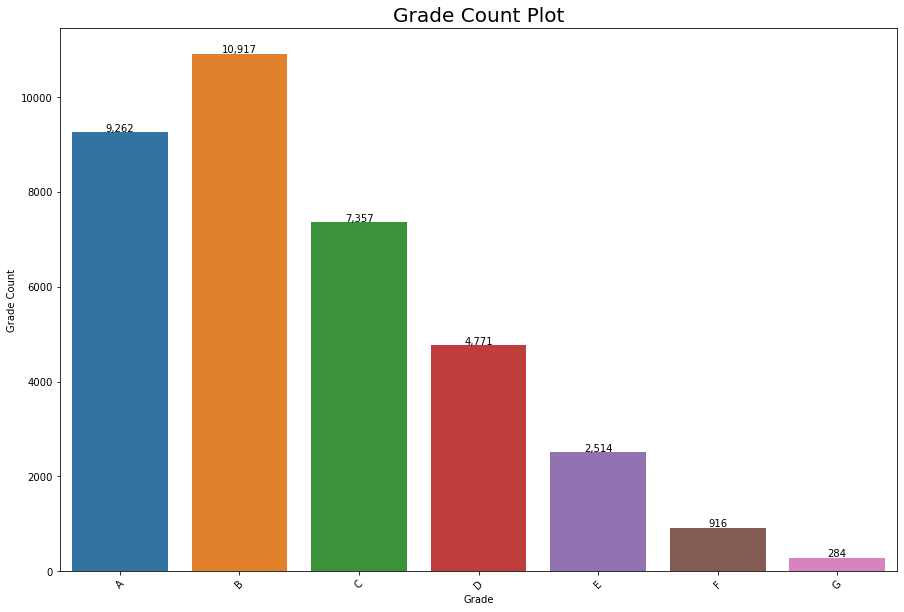

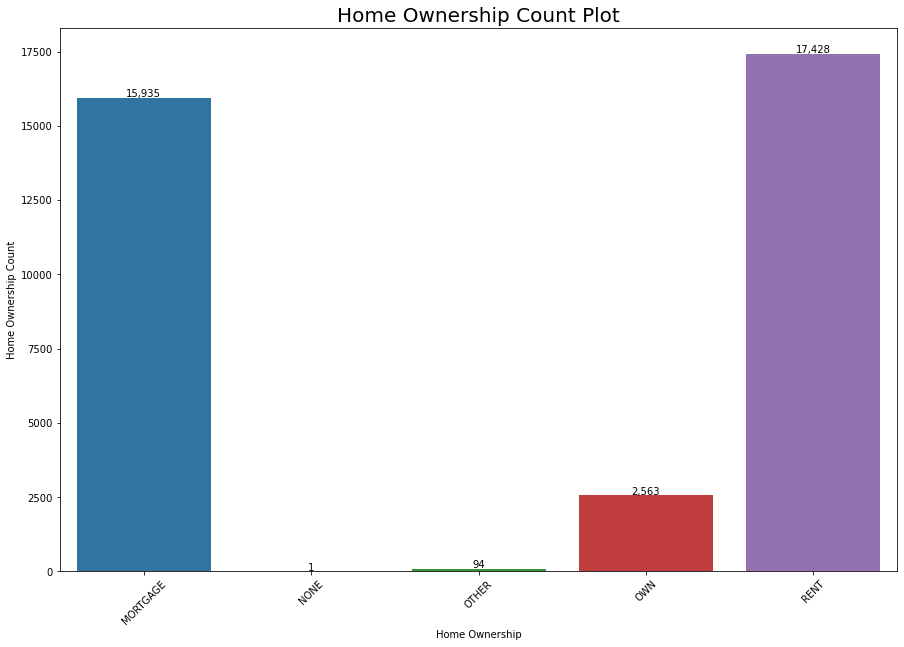

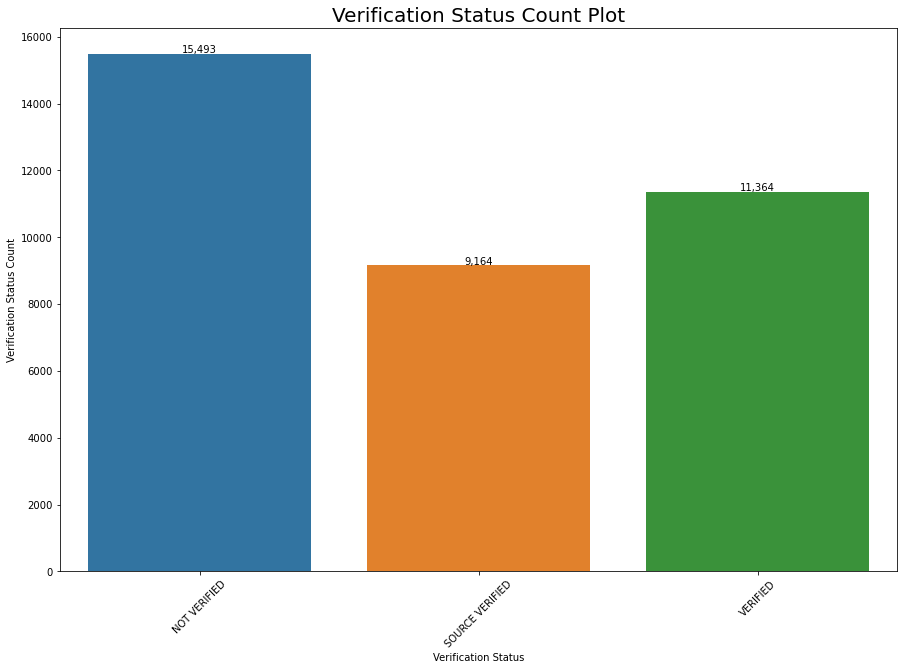

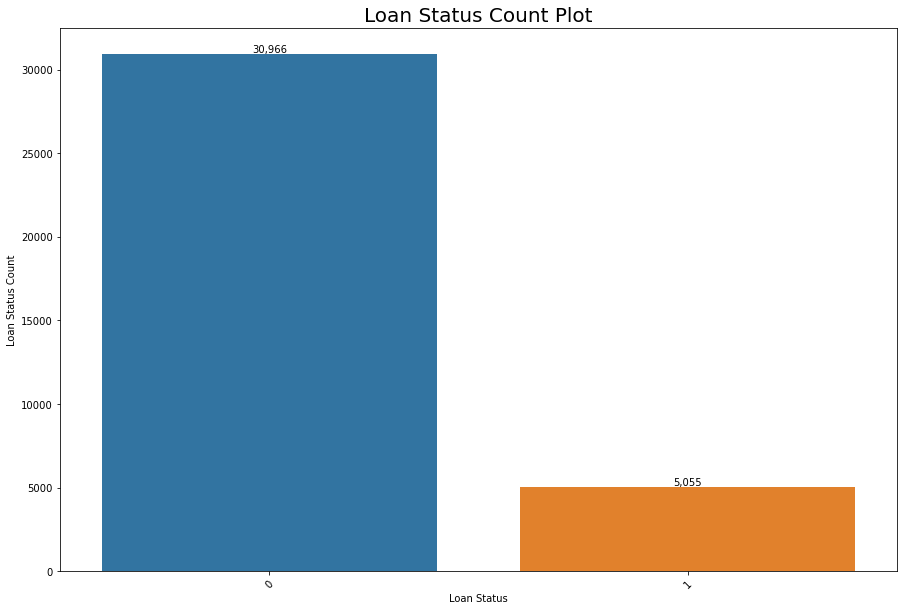

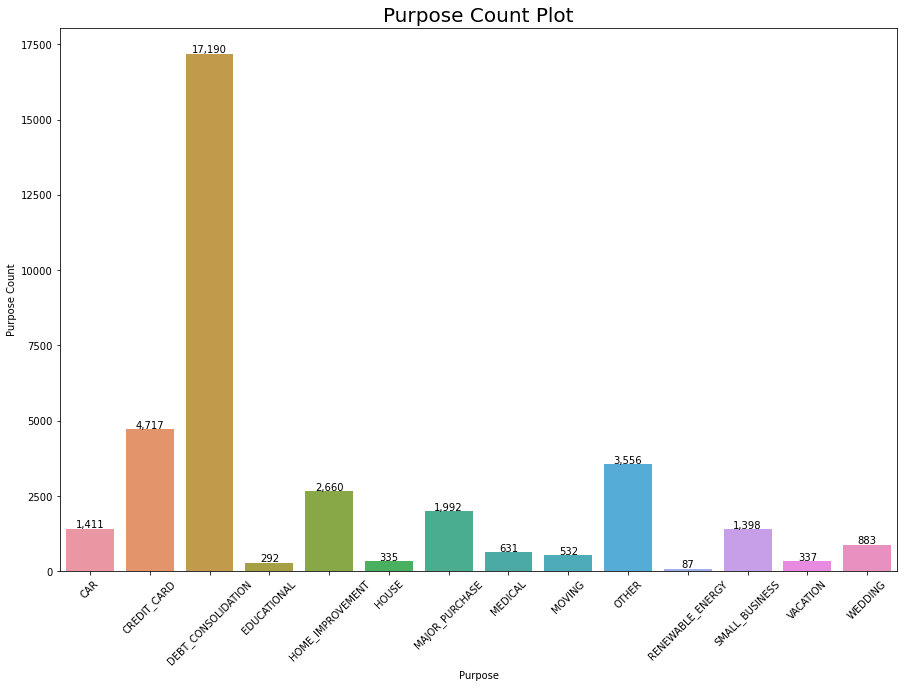

In [183]:


def plot_univariate_categorical_columns():
    for c in cleanDf.select_dtypes('category').columns:
        value_counts_ser = cleanDf[c].value_counts().sort_index()
        cnt_len = len(value_counts_ser)
        # display(cnt_len)
        if cnt_len < 16:
            t, xl, yl = get_univariate_cat_plot_strs(c)
            plot_univariate_series(value_counts_ser, t,
                                   xl, yl, figsize=(15, 10), x_rotation=45)


plot_univariate_categorical_columns()


In [184]:
num_cols = cleanDf.select_dtypes([np.number]).columns
num_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt_inv'],
      dtype='object')

In [185]:


def describe_num_columns():
    for c in num_cols:
        display(f"Decribing {get_title(c)}")
        display(cleanDf[c].describe())



In [186]:
describe_num_columns()


'Decribing Loan Amnt'

count    36021.000000
mean     11115.148802
std       7311.306957
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

'Decribing Funded Amnt'

count    36021.000000
mean     10850.993865
std       7057.504887
min        500.000000
25%       5450.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

'Decribing Funded Amnt Inv'

count    36021.000000
mean     10281.019840
std       6993.120225
min          0.000000
25%       5000.000000
50%       8900.000000
75%      14046.422200
max      35000.000000
Name: funded_amnt_inv, dtype: float64

'Decribing Term'

count    36021.000000
mean        41.989839
std         10.386576
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

'Decribing Int Rate'

count    36021.000000
mean        11.960184
std          3.683246
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

'Decribing Installment'

count    36021.000000
mean       324.124189
std        207.214565
min         16.080000
25%        167.730000
50%        280.910000
75%        426.990000
max       1305.190000
Name: installment, dtype: float64

'Decribing Emp Length'

count    36021.000000
mean        25.093557
std         40.017578
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         99.000000
Name: emp_length, dtype: float64

'Decribing Annual Inc'

count    3.602100e+04
mean     6.910309e+04
std      6.466444e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.232000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

'Decribing Dti'

count    36021.000000
mean        13.360290
std          6.644697
min          0.000000
25%          8.270000
50%         13.470000
75%         18.610000
max         29.990000
Name: dti, dtype: float64

'Decribing Inq Last 6Mths'

count    36021.000000
mean         0.870076
std          1.068061
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

'Decribing Open Acc'

count    36021.000000
mean         9.333889
std          4.394021
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

'Decribing Pub Rec'

count    36021.000000
mean         0.053746
std          0.234926
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

'Decribing Revol Bal'

count     36021.000000
mean      13378.510424
std       15733.147269
min           0.000000
25%        3762.000000
50%        8923.000000
75%       17065.000000
max      149588.000000
Name: revol_bal, dtype: float64

'Decribing Revol Util'

count    36021.000000
mean        49.028138
std         28.255039
min          0.000000
25%         25.700000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

'Decribing Total Acc'

count    36021.000000
mean        22.157547
std         11.408527
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

'Decribing Total Pymnt Inv'

count    36021.000000
mean     11381.293563
std       8681.892503
min          0.000000
25%       5143.920000
50%       9235.660000
75%      15457.730000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

In [187]:


def plot_univariate_continuous_columns_hist():
    for c in num_cols:
        t, xl = get_univariate_hist_plot_strs(c)
        plot_univariate_series(cleanDf[c], t,
                               xl, None, figsize=(15, 10), x_rotation=45, plot_type=PlotType.HIST, show_count=False)



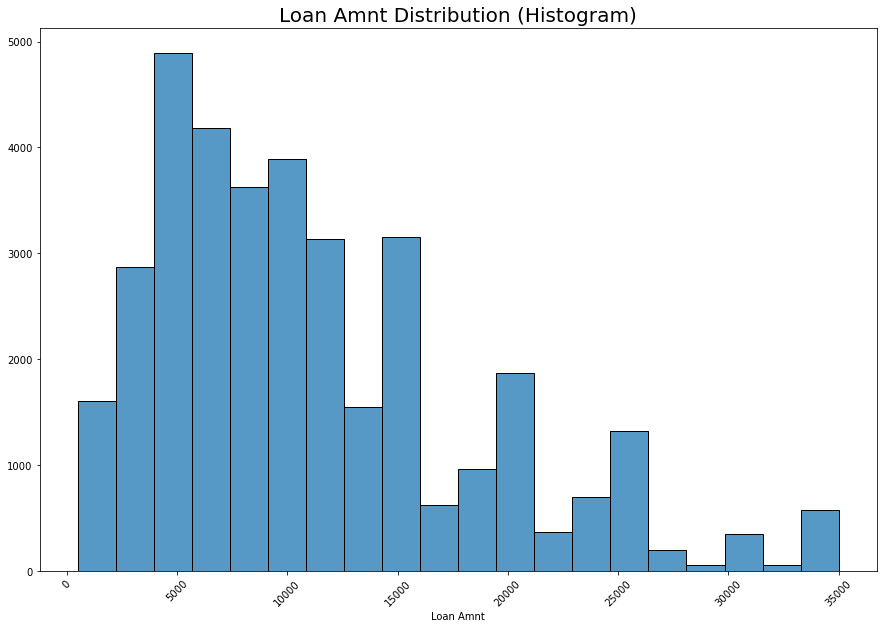

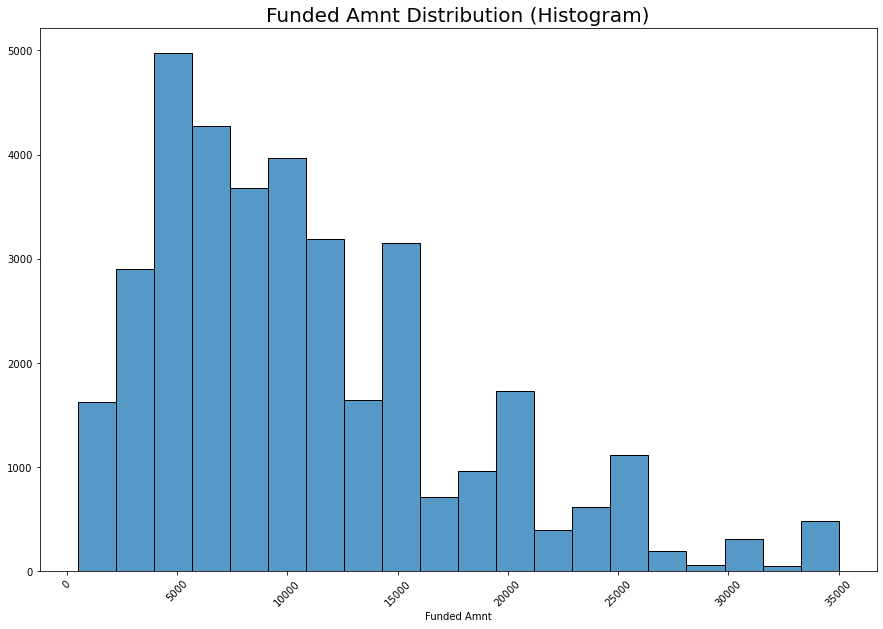

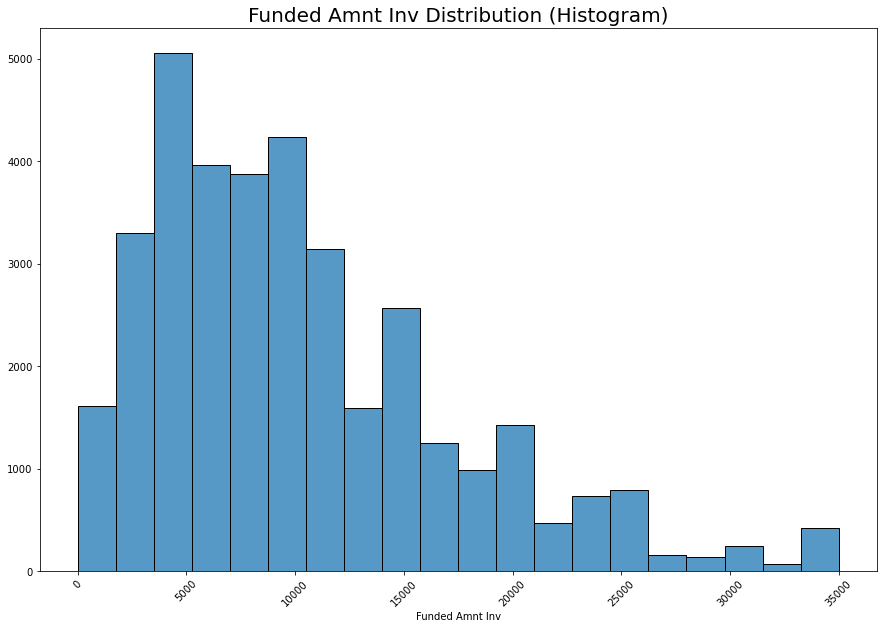

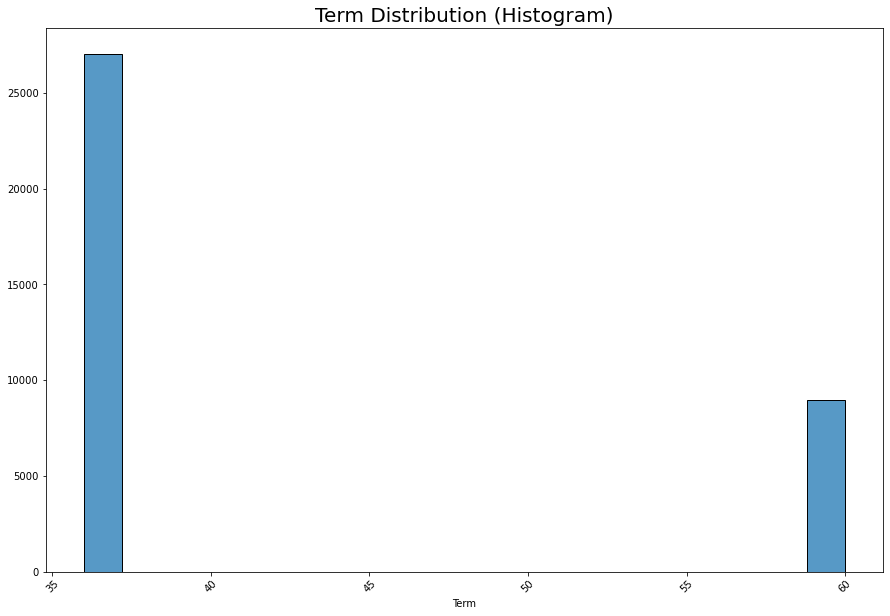

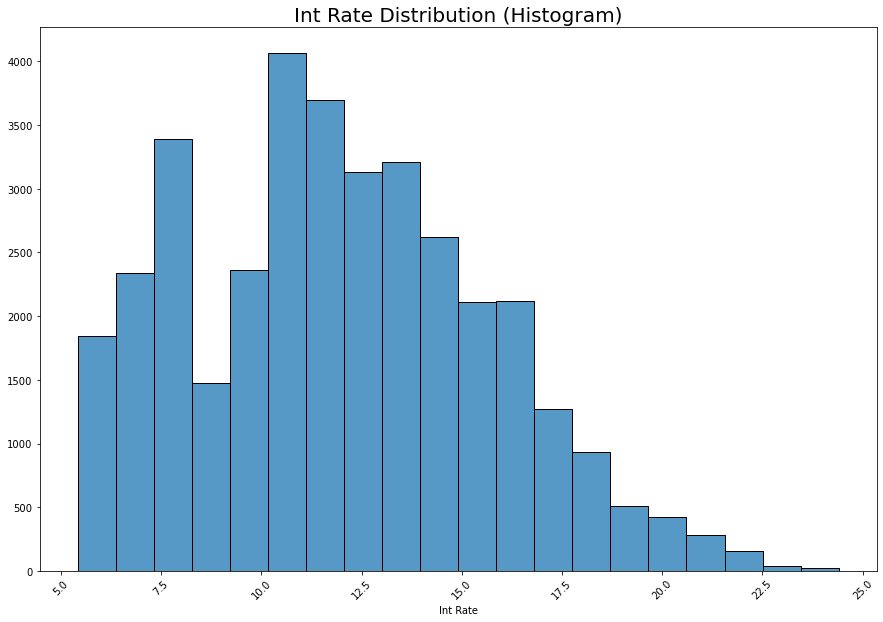

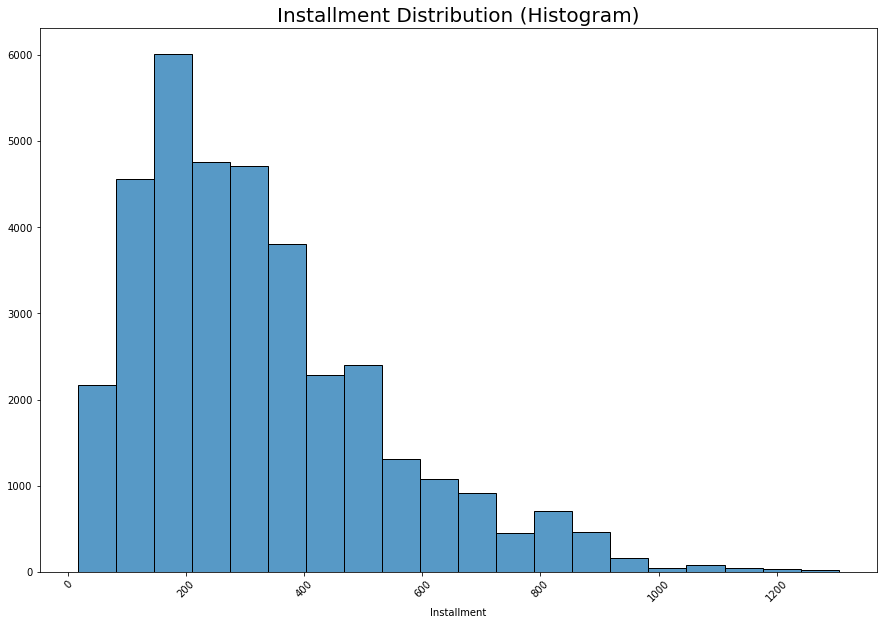

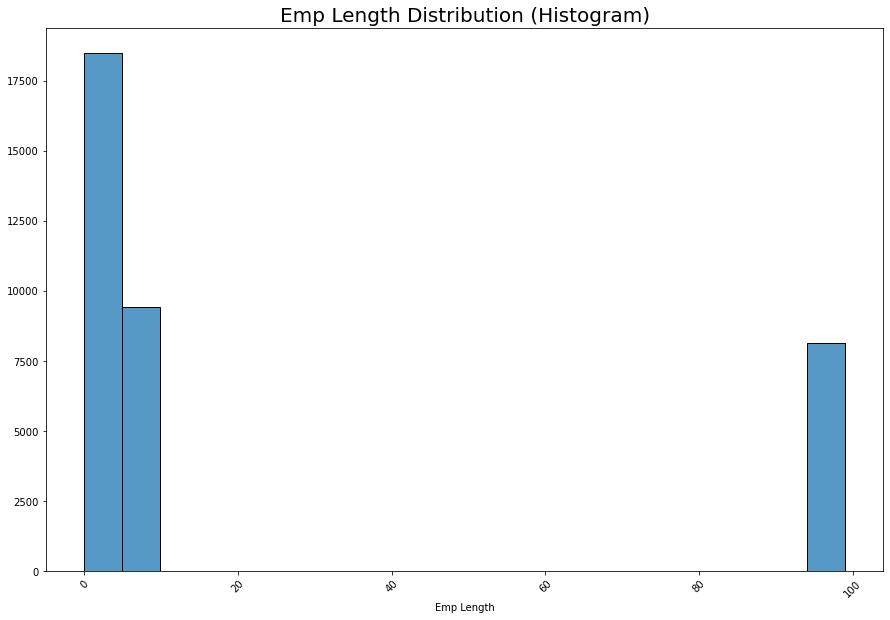

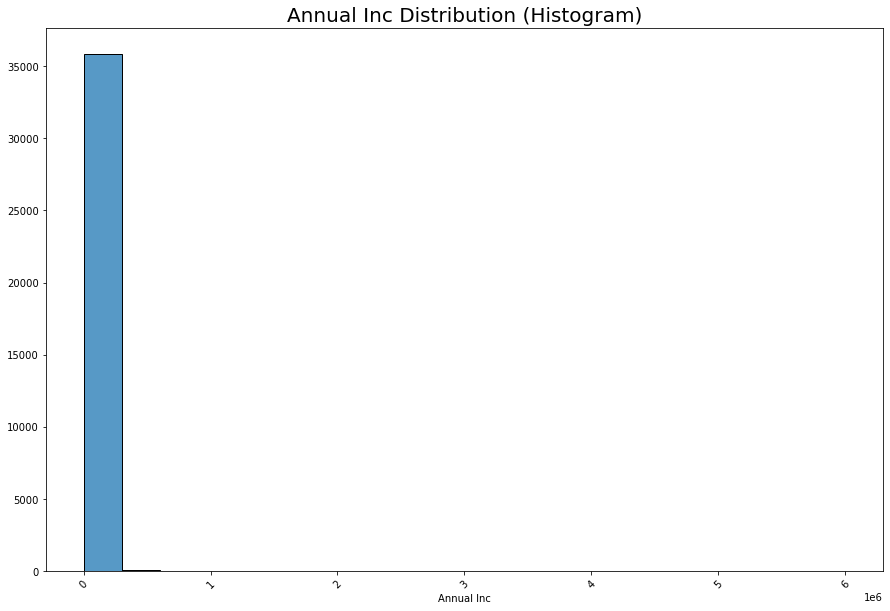

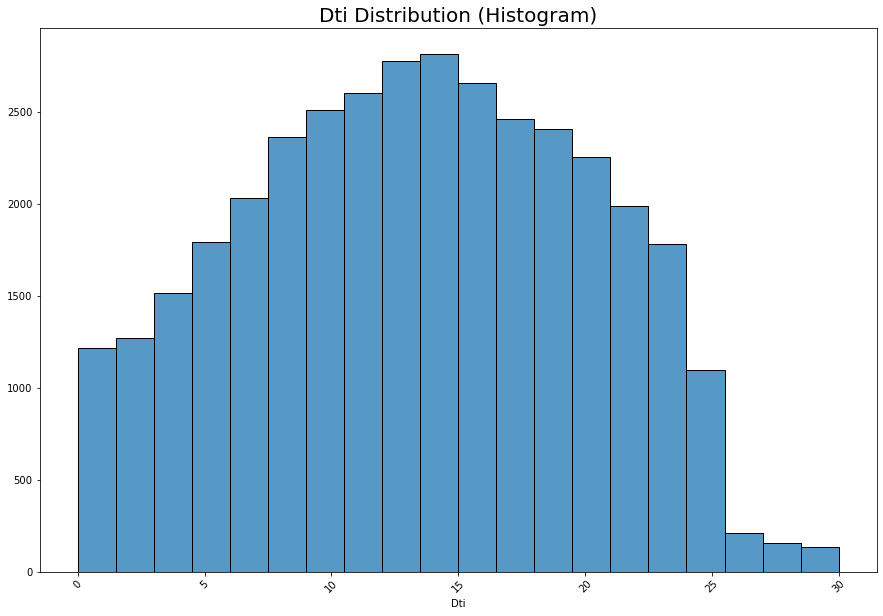

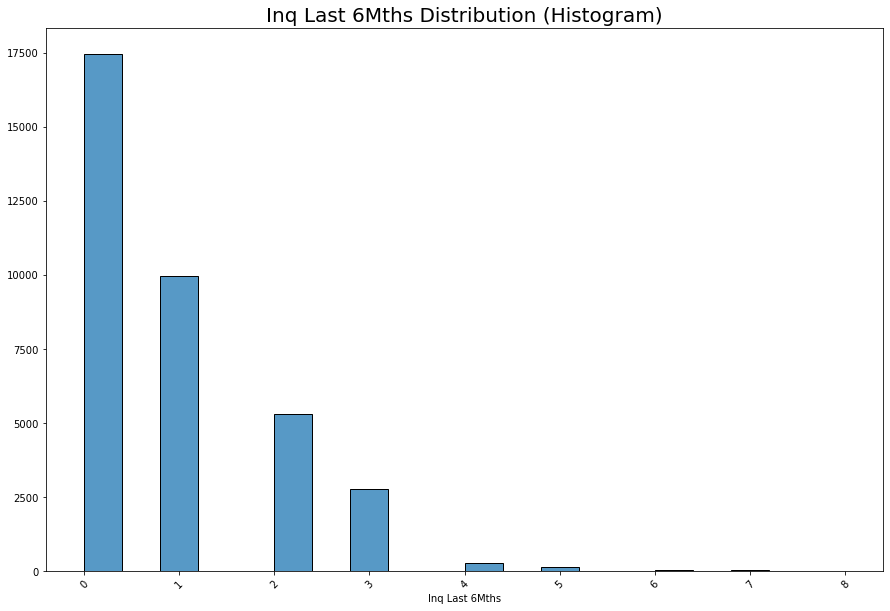

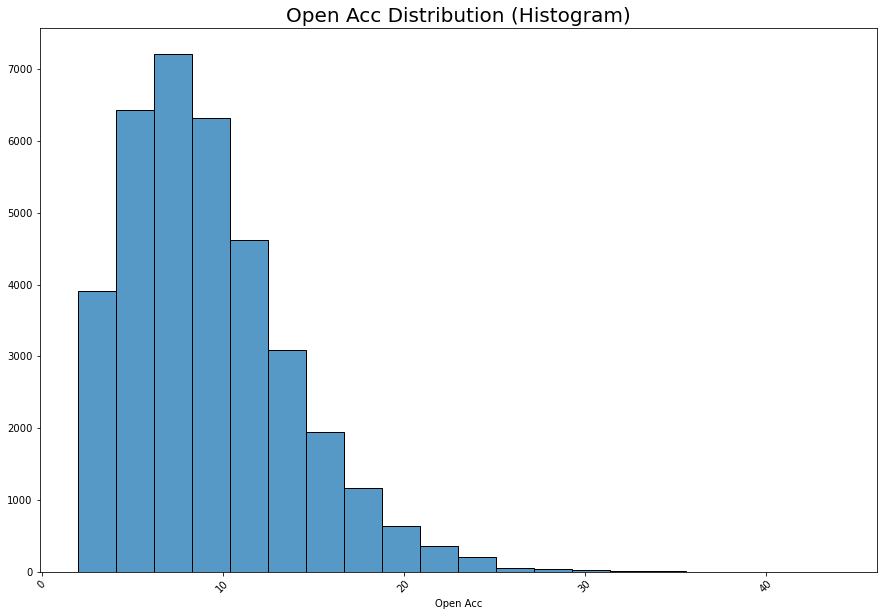

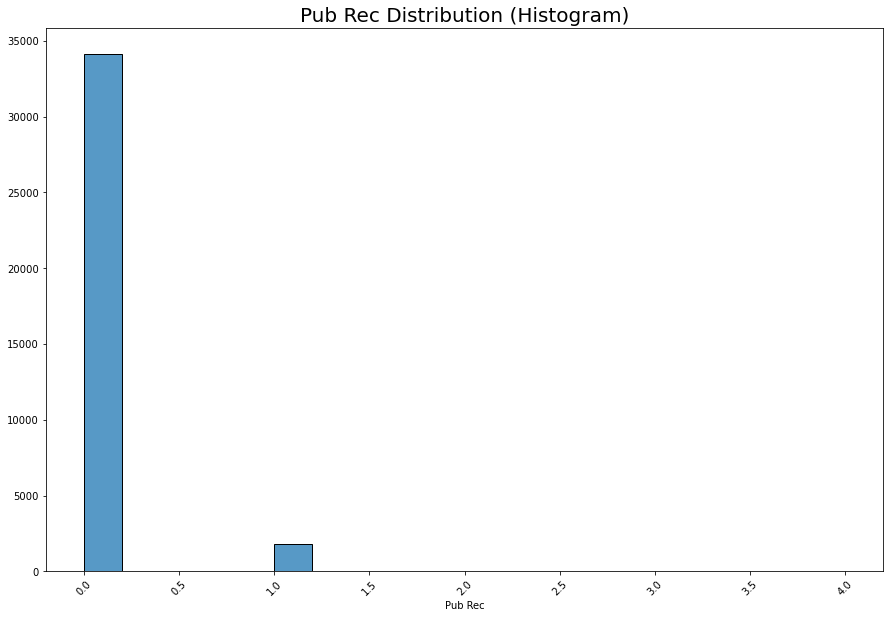

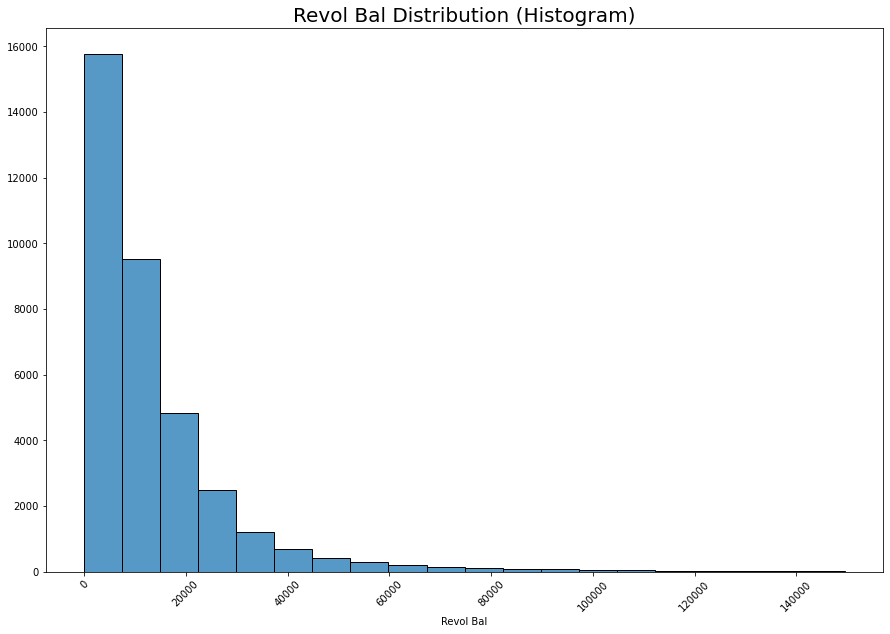

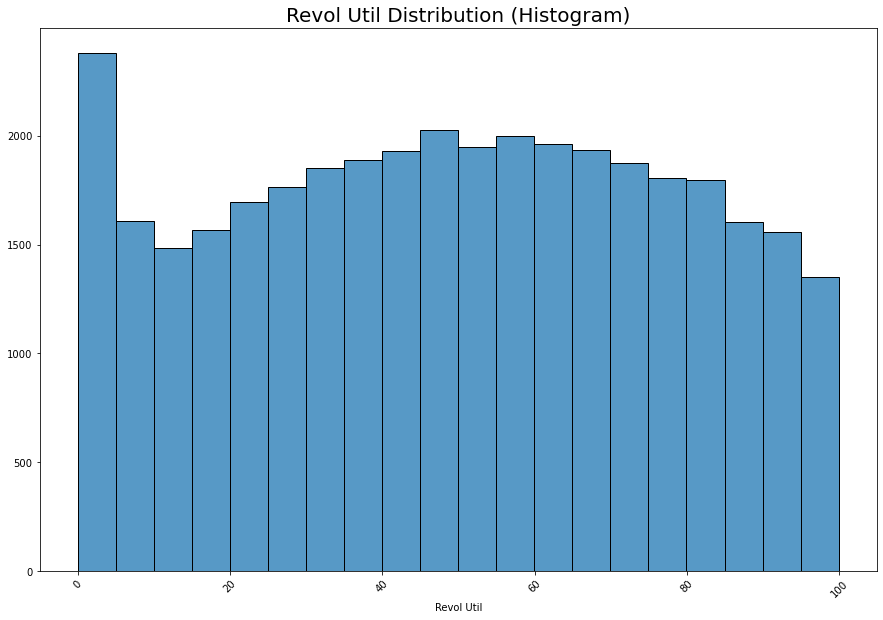

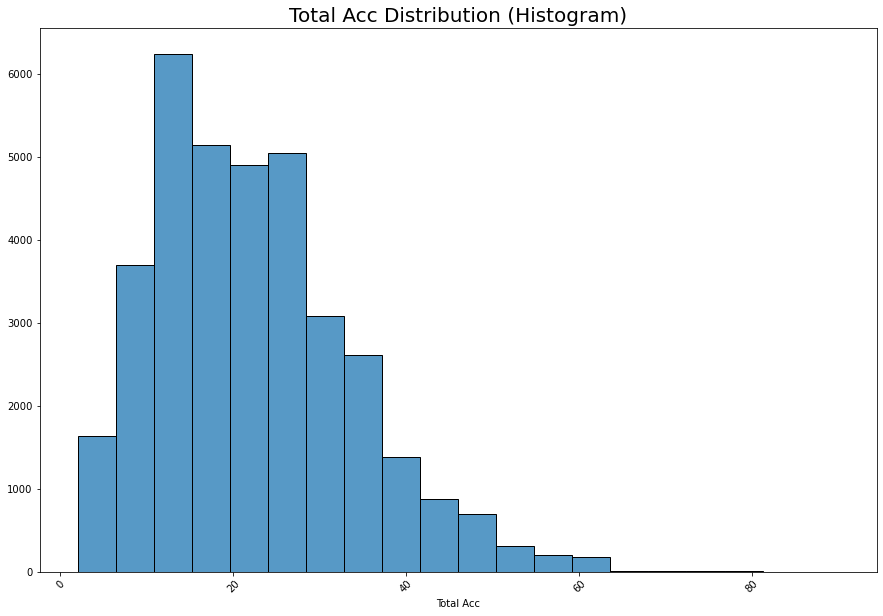

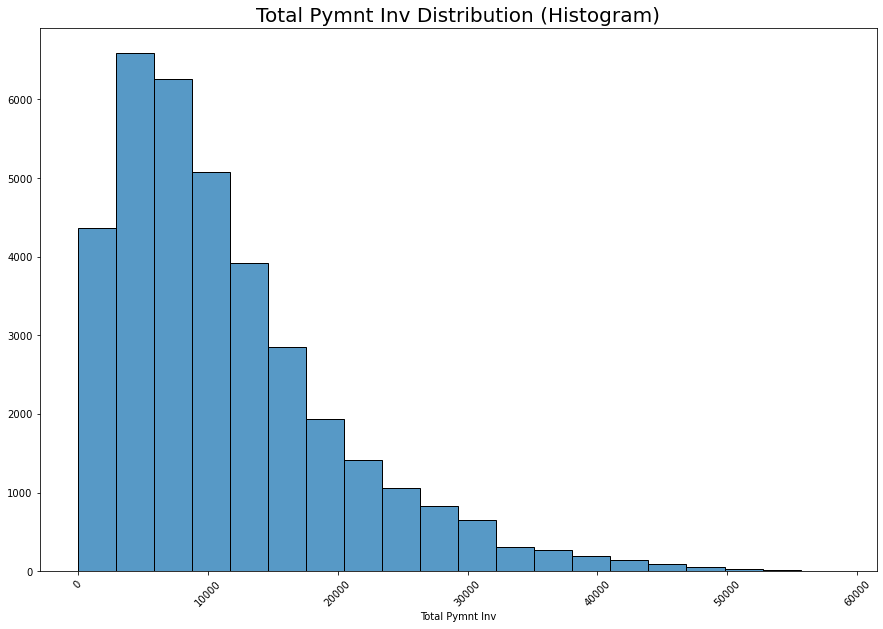

In [188]:
plot_univariate_continuous_columns_hist()

In [189]:


def plot_univariate_continuous_columns_box():
    for c in num_cols:
        t, xl = get_univariate_box_plot_strs(c)
        plot_univariate_series(cleanDf[c], t,
                               xl, None, figsize=(15, 10), x_rotation=45, plot_type=PlotType.BOX, show_count=False)



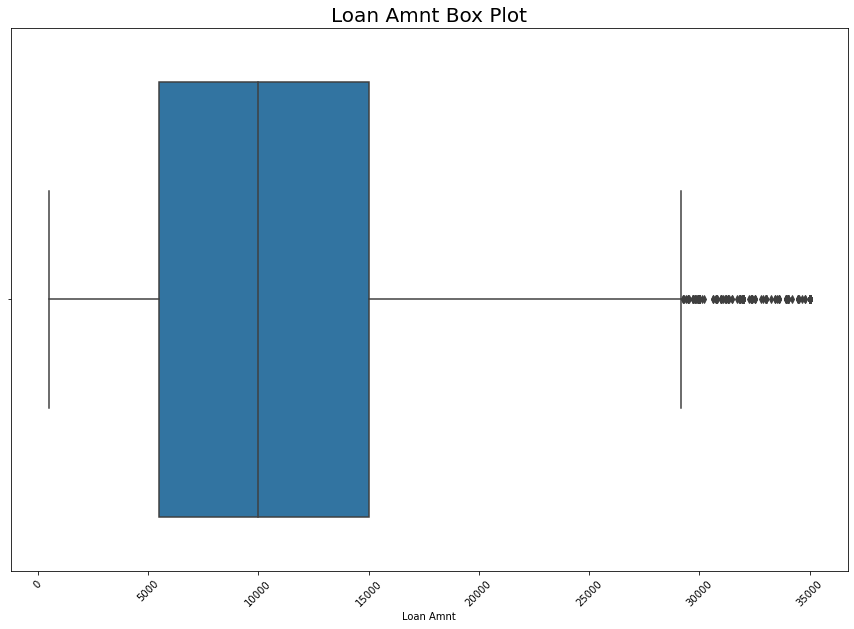

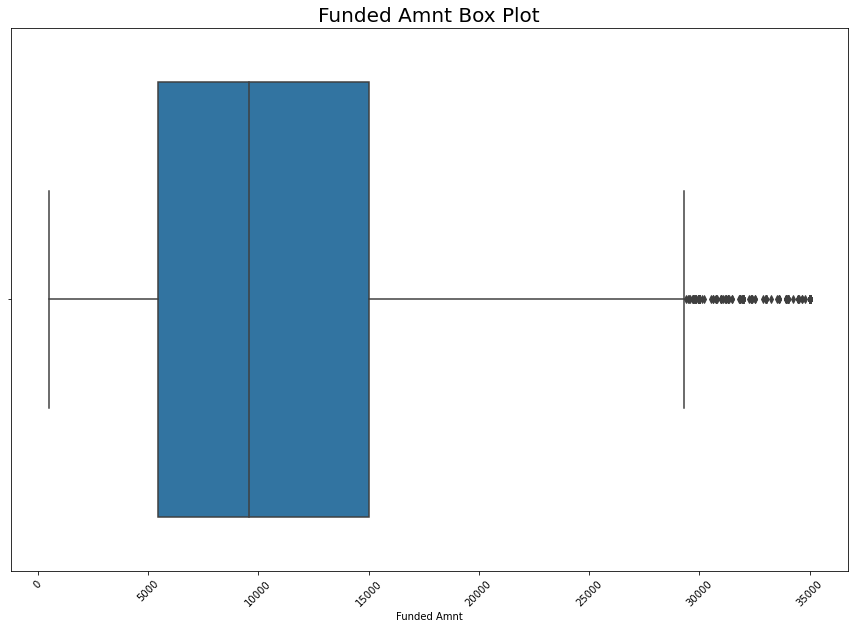

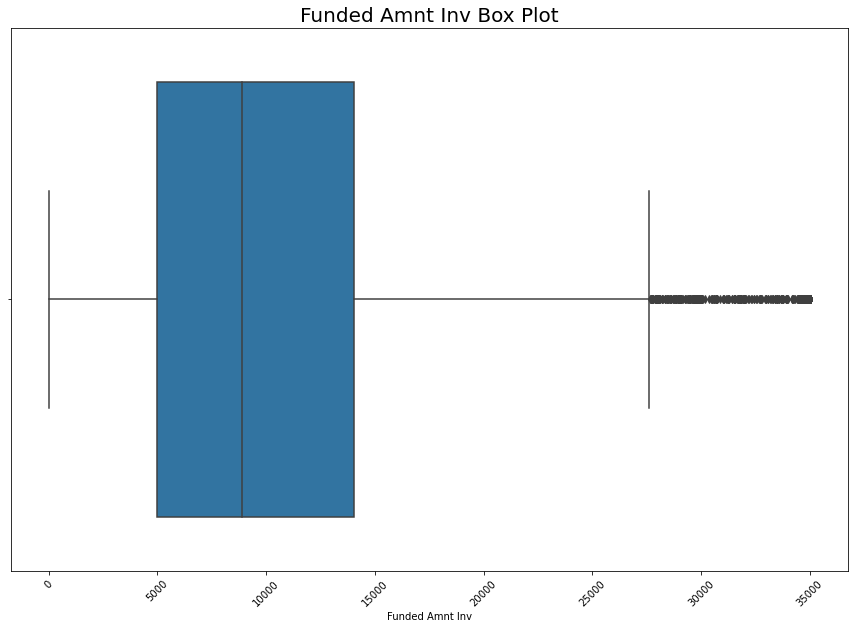

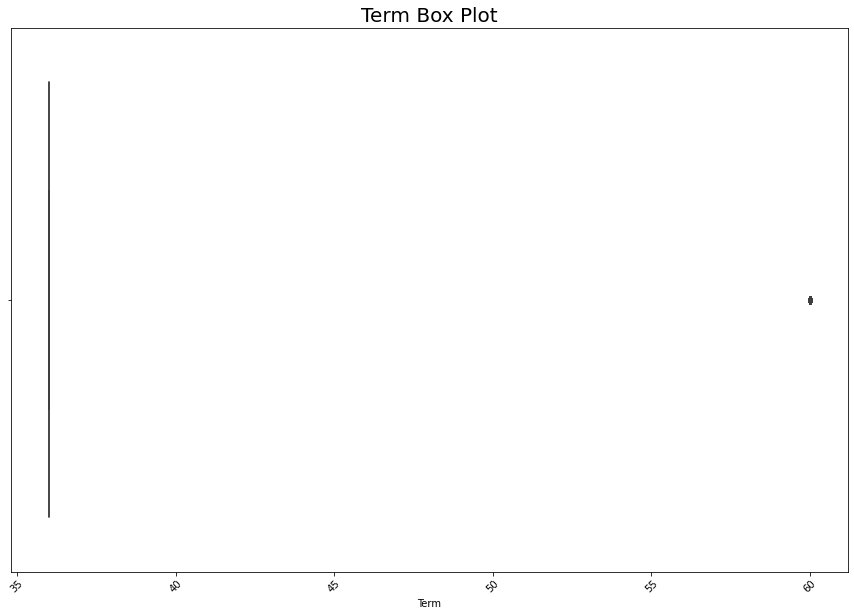

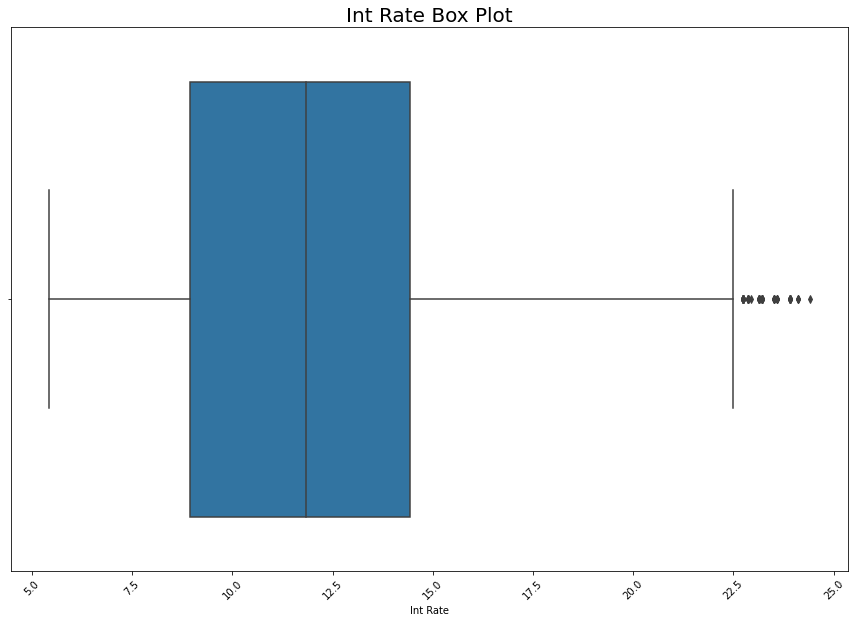

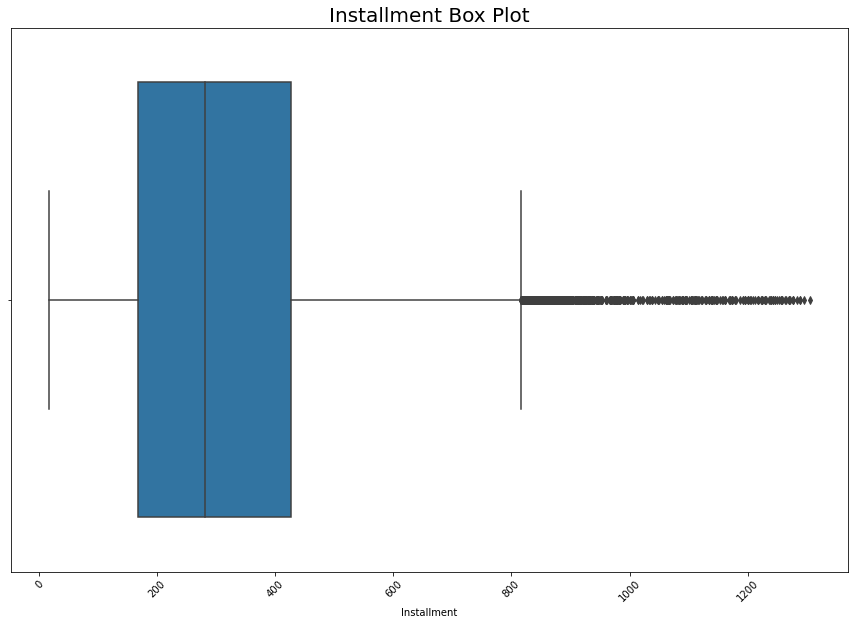

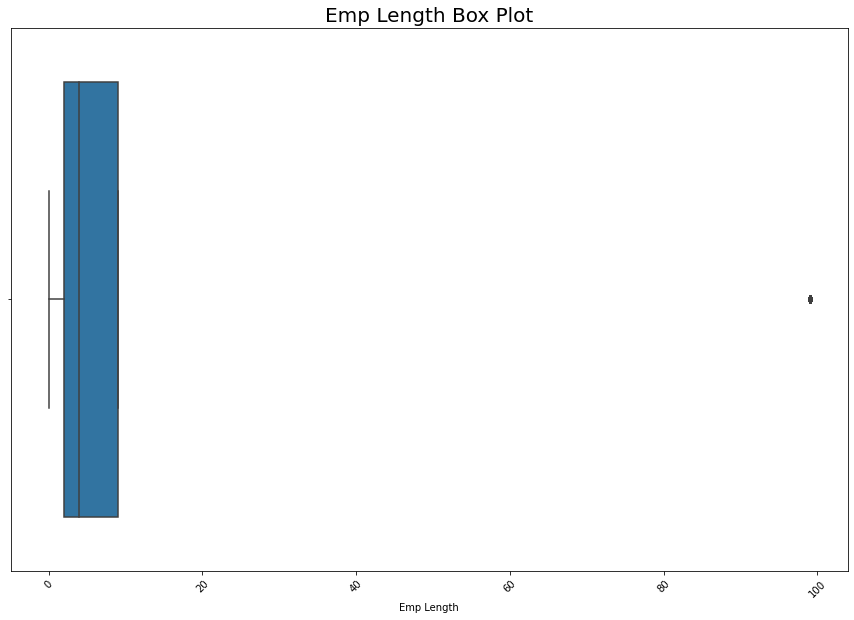

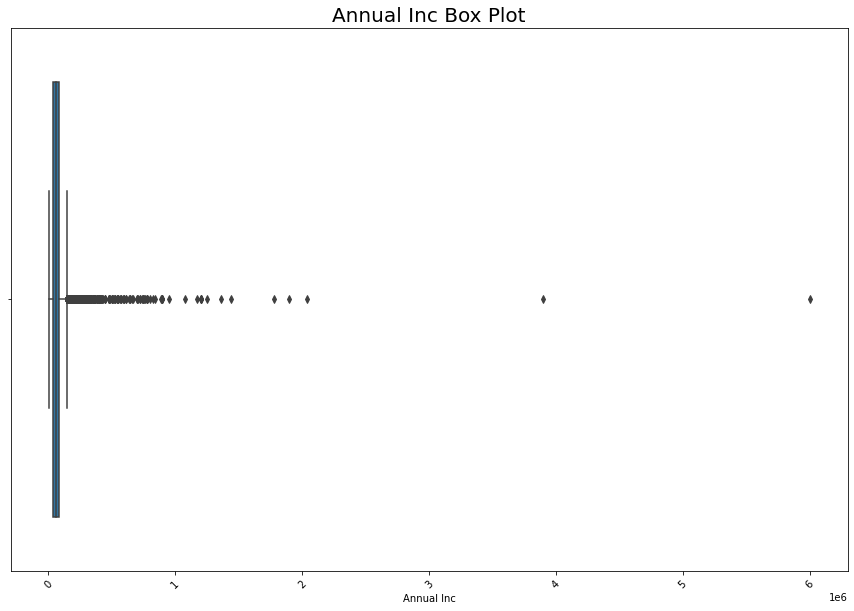

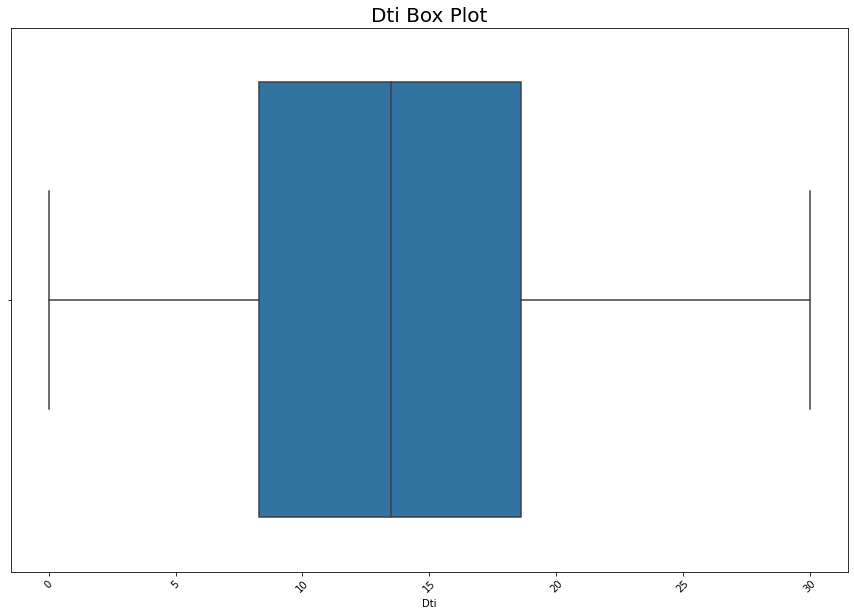

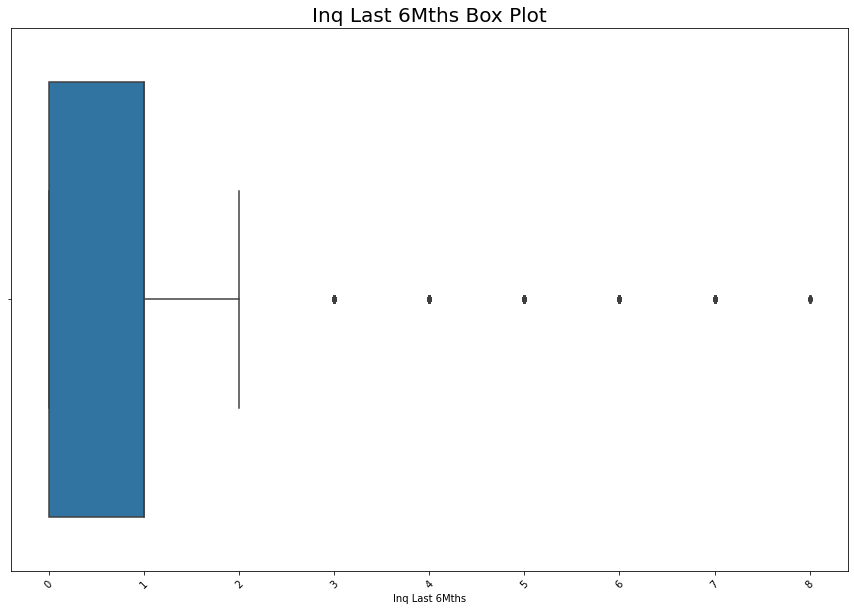

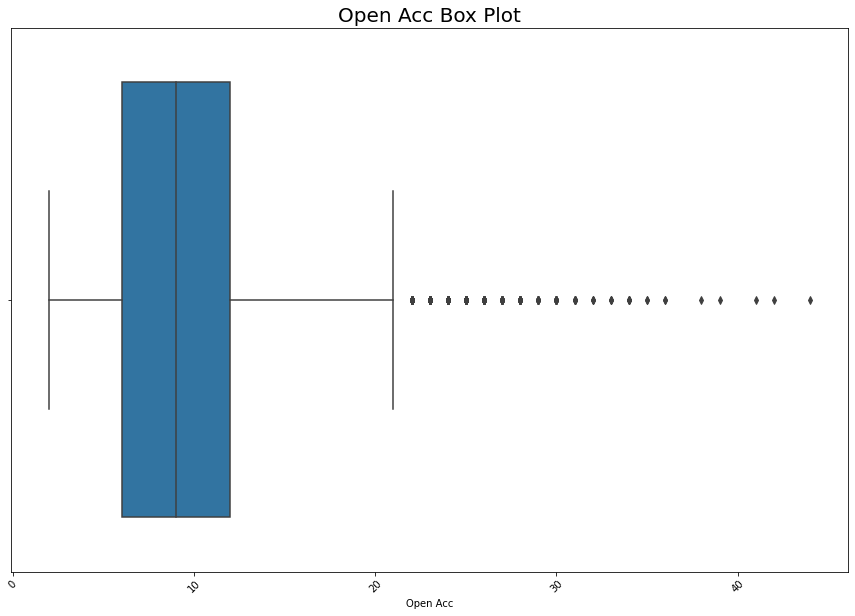

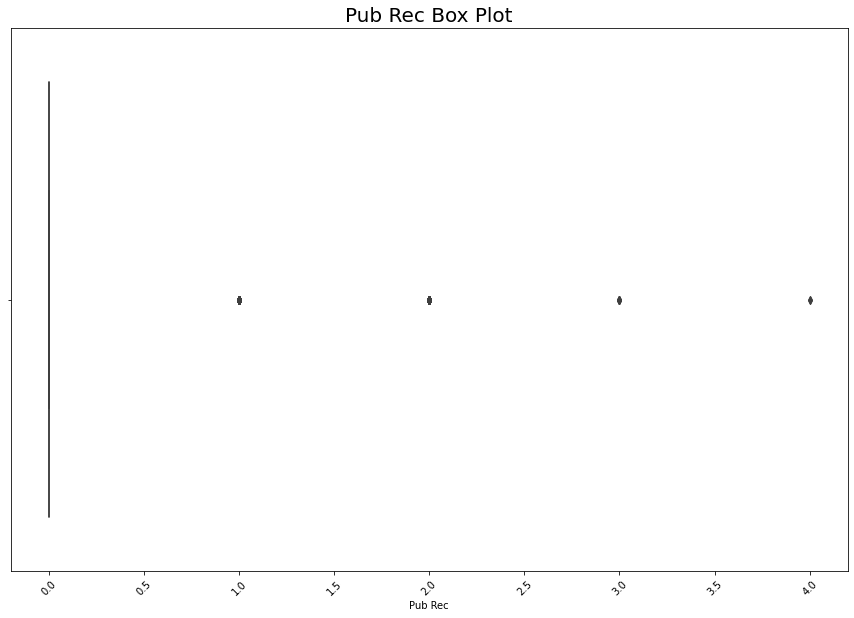

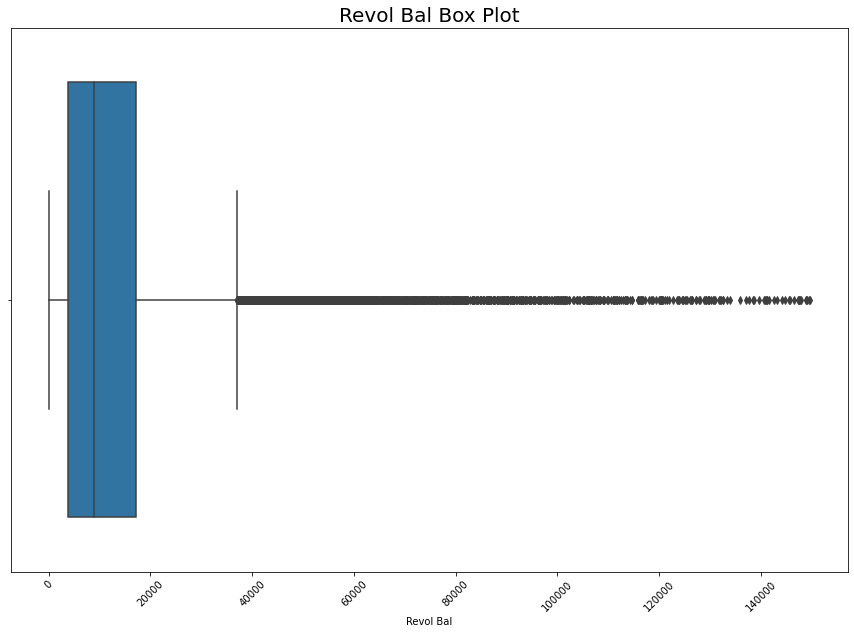

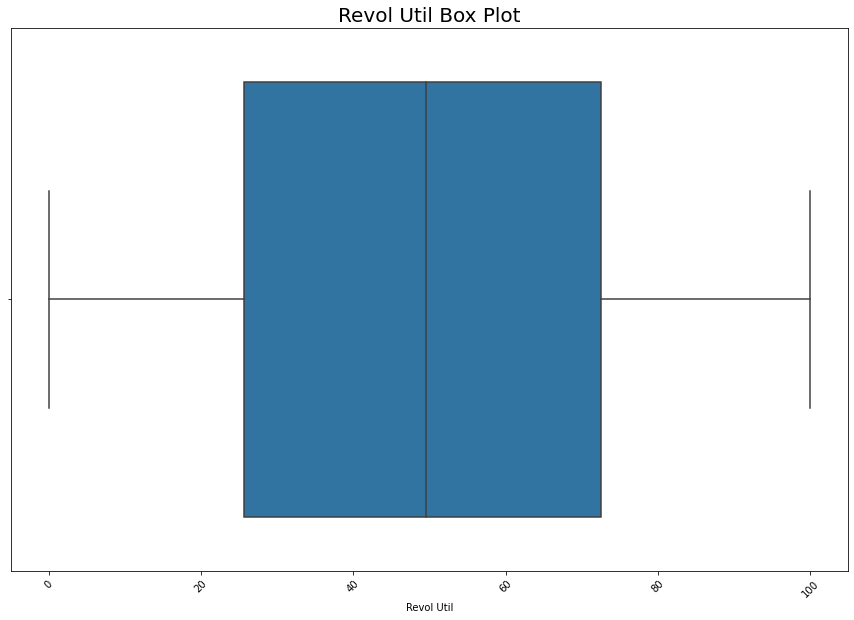

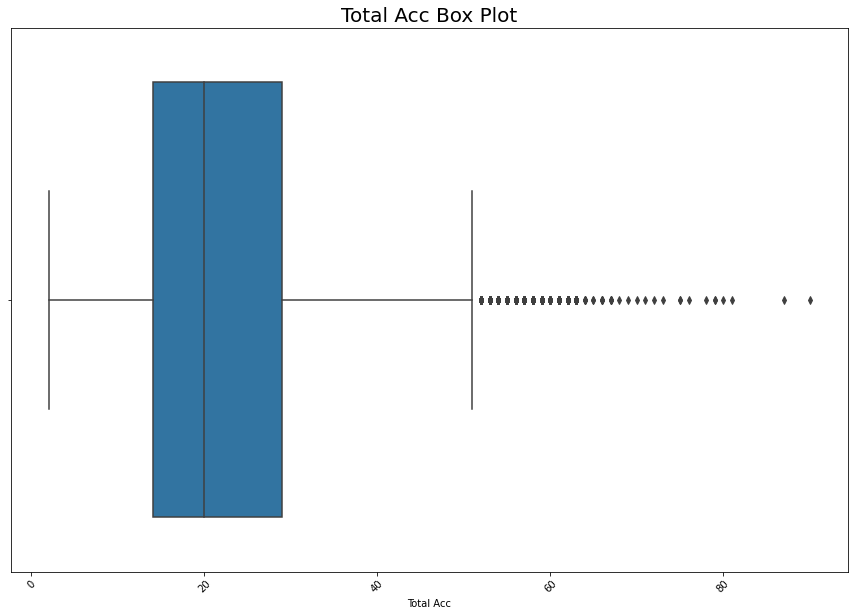

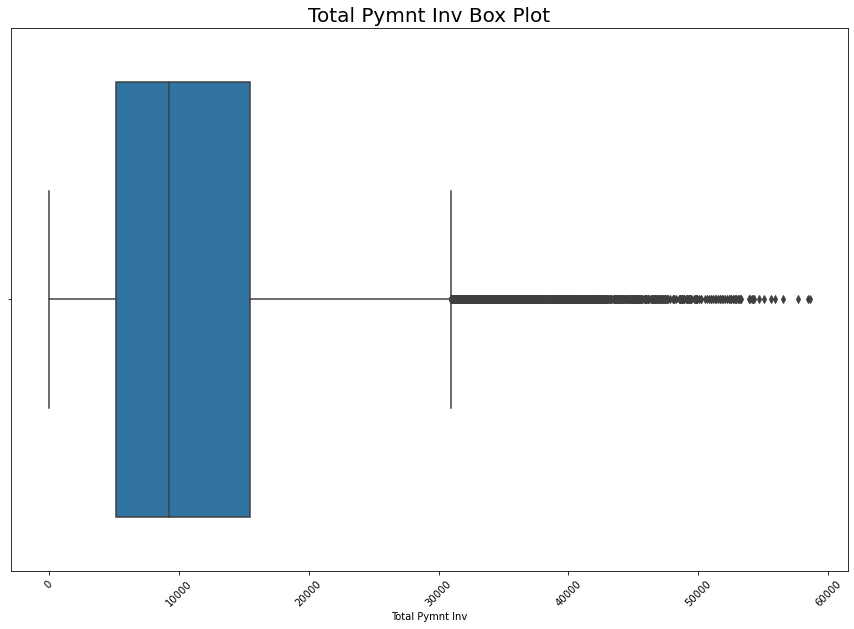

In [190]:
plot_univariate_continuous_columns_box()


<h2> Bi-Variate analysis </h2>

<h3> We are going to follow 5 bin policy ['Very Low', 'Low', 'Medium', 'High', 'Very High'] for any numerical reason because this is just natural and psychologically easy to adapting to people</h3>

**Unique Value counts in continuous columns**

In [191]:

numeric_values_unique_count = pd.Series(
    [cleanDf[c].nunique() for c in num_cols], index=num_cols).sort_values()
cols_to_bin = numeric_values_unique_count[numeric_values_unique_count > 5].index

bin_cats = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
numeric_cat_cols = []


def make_cat_cols_for_numerics():
    for col in cols_to_bin:
        new_col_name = col+"_cat"
        numeric_cat_cols.append(new_col_name)
        cleanDf[new_col_name] = pd.cut(cleanDf[col], 5, labels=bin_cats)



In [192]:
make_cat_cols_for_numerics()


In [193]:
cleanDf.head()


loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       2500         2500           2500.0    60     15.27        59.83     C   
1      10000        10000          10000.0    36     13.49       339.31     C   
2       5000         5000           5000.0    36      7.90       156.46     A   
3       7000         7000           7000.0    60     15.96       170.08     C   
4       3000         3000           3000.0    36     18.64       109.43     E   

  sub_grade                  emp_title  emp_length home_ownership  annual_inc  \
0        C4                      RYDER           0           RENT     30000.0   
1        C1        AIR RESOURCES BOARD          99           RENT     49200.0   
2        A4       VEOLIA TRANSPORTATON           3           RENT     36000.0   
3        C5  SOUTHERN STAR PHOTOGRAPHY           8           RENT     47004.0   
4        E1            MKC ACCOUNTING            9           RENT     48000.0   

  verification_status    issue_d loan_status             purpose  \
0     SOURCE VERIFIED 2011-12-01           1                 CAR   
1     SOURCE VERIFIED 2011-12-01           0               OTHER   
2     SOURCE VERIFIED 2011-12-01           0             WEDDING   
3        NOT VERIFIED 2011-12-01           0  DEBT_CONSOLIDATION   
4     SOURCE VERIFIED 2011-12-01           0                 CAR   

                                   title zip_code addr_state    dti  \
0                                   BIKE      309         GA   1.00   
1                               PERSONEL      917         CA  20.00   
2  MY WEDDING LOAN I PROMISE TO PAY BACK      852         AZ  11.20   
3                                   LOAN      280         NC  23.51   
4                        CAR DOWNPAYMENT      900         CA   5.35   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1999-04-01               5         3        0       1687         9.4   
1       1996-02-01               1        10        0       5598        21.0   
2       2004-11-01               3         9        0       7963        28.3   
3       2005-07-01               1         7        0      17726        85.6   
4       2007-01-01               2         4        0       8221        87.5   

   total_acc  total_pymnt_inv last_pymnt_d inq_last_6mths_cat emp_length_cat  \
0          4          1008.71   2013-04-01               High       Very Low   
1         37         12231.89   2015-01-01           Very Low      Very High   
2         12          5632.21   2015-01-01                Low       Very Low   
3         11         10110.84   2016-05-01           Very Low       Very Low   
4          4          3939.14   2015-01-01                Low       Very Low   

  open_acc_cat total_acc_cat int_rate_cat loan_amnt_cat funded_amnt_cat  \
0     Very Low      Very Low       Medium      Very Low        Very Low   
1     Very Low           Low       Medium           Low             Low   
2     Very Low      Very Low     Very Low      Very Low        Very Low   
3     Very Low      Very Low       Medium      Very Low        Very Low   
4     Very Low      Very Low         High      Very Low        Very Low   

  revol_util_cat   dti_cat annual_inc_cat funded_amnt_inv_cat installment_cat  \
0       Very Low  Very Low       Very Low            Very Low        Very Low   
1            Low      High       Very Low                 Low             Low   
2            Low       Low       Very Low            Very Low        Very Low   
3      Very High      High       Very Low            Very Low        Very Low   
4      Very High  Very Low       Very Low            Very Low        Very Low   

  revol_bal_cat total_pymnt_inv_cat  
0      Very Low            Very Low  
1      Very Low                 Low  
2      Very Low            Very Low  
3      Very Low            Very Low  
4      Very Low            Very Low

In [194]:
cleanDf['loan_status'] = cleanDf['loan_status'].astype(int)

In [195]:
t_col = 'loan_status'


In [196]:
all_cat_columns = cleanDf.select_dtypes('category').columns
feature_info_gain = []
cols_under_observation = []
stats_groups = {}


In [197]:


def calculate_stats_for_columns():
    for var_col in all_cat_columns:
        v_counts = len(cleanDf[var_col].value_counts())
        if v_counts < 10:
            groups = cleanDf.groupby(var_col).agg(
                {t_col: ['mean', 'count', 'sum']}).reset_index()
            groups.columns = [var_col, "def_frac", 'total', 'def_count']
            groups['non_def'] = groups['total'] - groups['def_count']
            groups['non_def_frac'] = 1 - groups['def_frac']
            information_gain = groups['def_frac'].max(
            ) - groups['def_frac'].min()
            groups.sort_values(by='def_count', ascending=False, inplace=True)
            feature_info_gain.append(information_gain)
            stats_groups.update({var_col: groups})
            cols_under_observation.append(var_col)



In [198]:
calculate_stats_for_columns()


In [199]:
info_gain_ser = pd.Series(
    feature_info_gain, index=cols_under_observation).sort_values(ascending=False)
info_gain_ser



int_rate_cat           0.339200
grade                  0.271537
home_ownership         0.191489
total_pymnt_inv_cat    0.178941
annual_inc_cat         0.166667
total_acc_cat          0.147497
inq_last_6mths_cat     0.120060
loan_amnt_cat          0.102276
revol_util_cat         0.098489
revol_bal_cat          0.097850
funded_amnt_cat        0.090299
funded_amnt_inv_cat    0.079718
installment_cat        0.074822
open_acc_cat           0.064502
dti_cat                0.048467
verification_status    0.041409
emp_length_cat         0.018692
dtype: float64

<h3>Plots </h3>
 1. Observations/comments need to be filled<br>
 2. A ploting function needs to be written to plot values from "stats_groups"

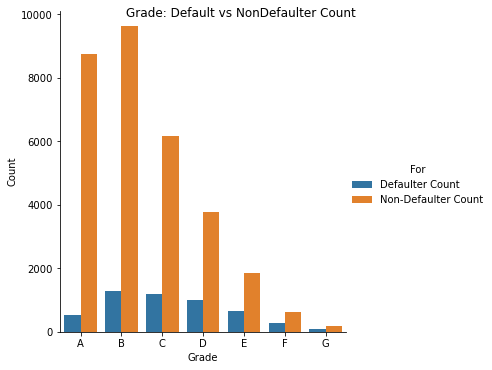

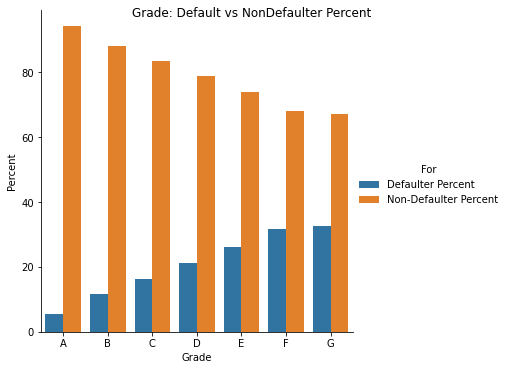

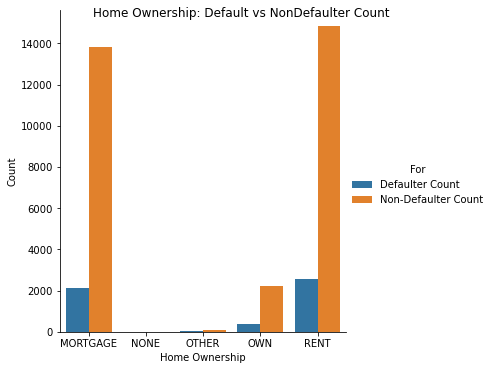

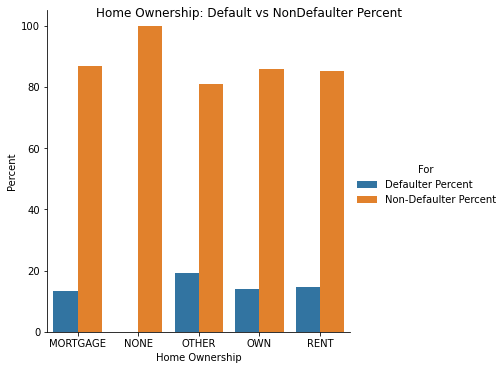

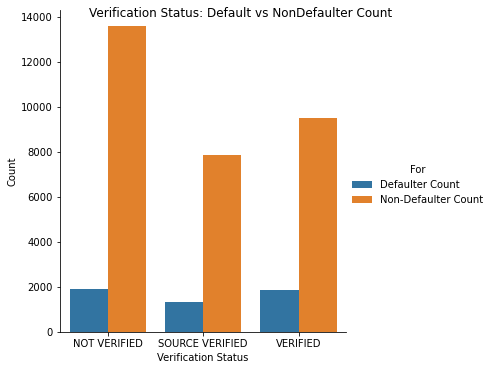

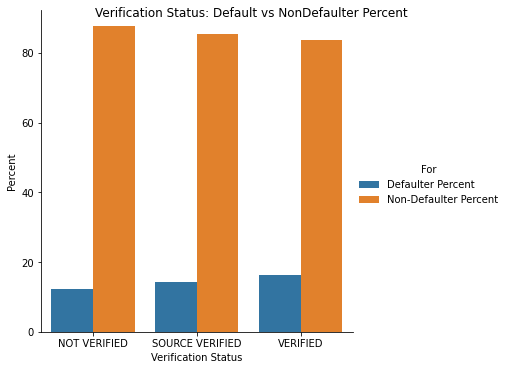

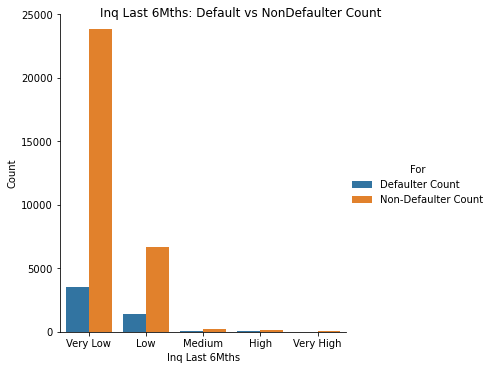

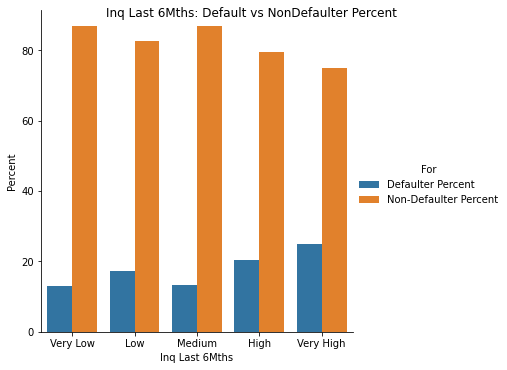

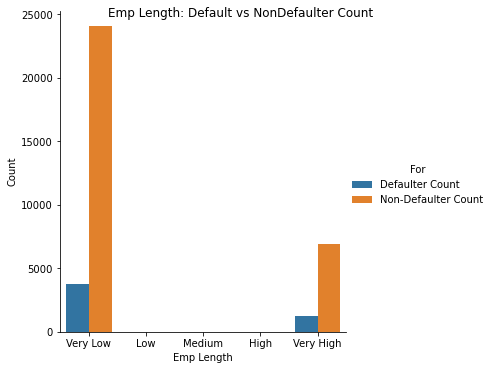

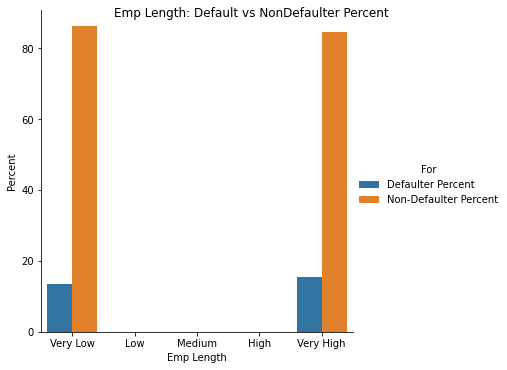

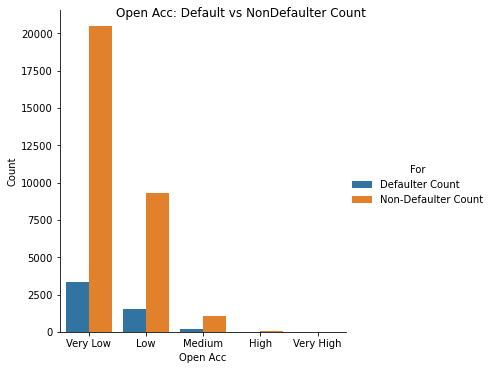

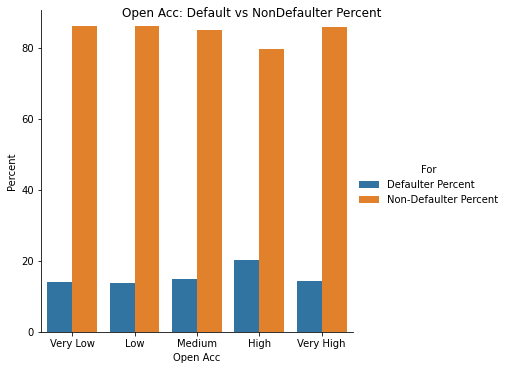

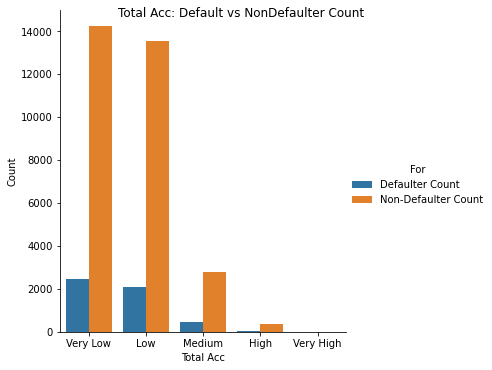

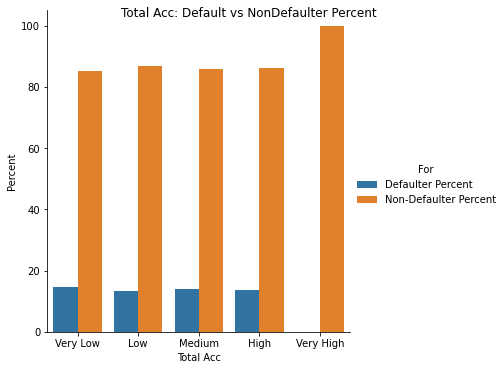

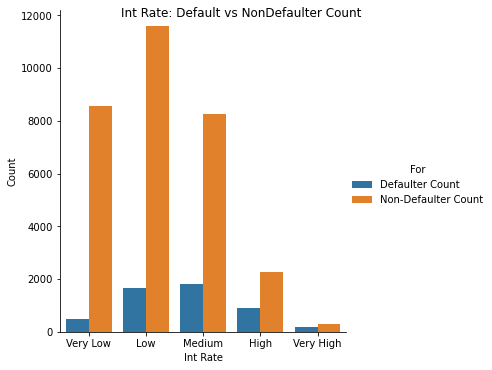

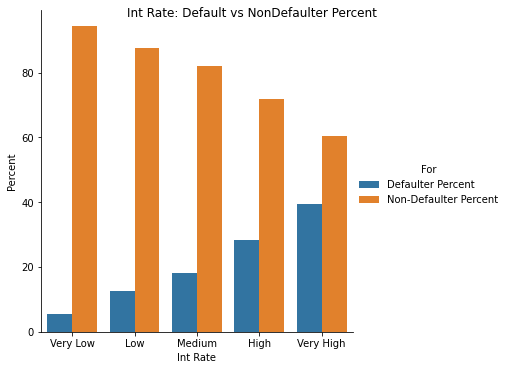

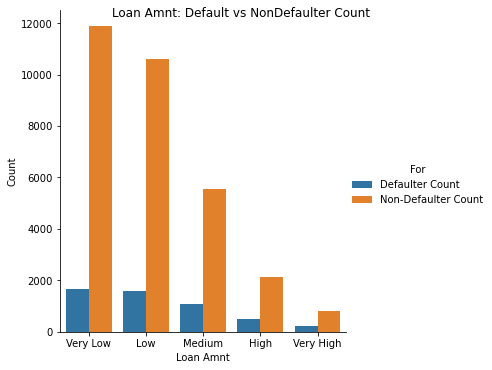

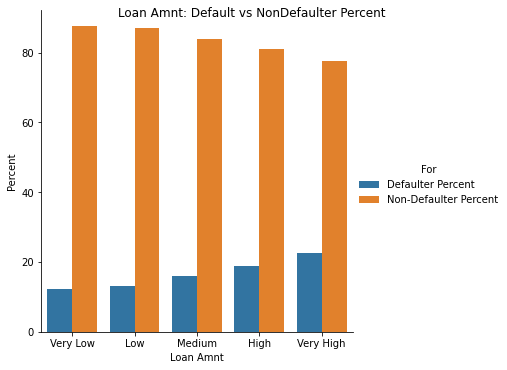

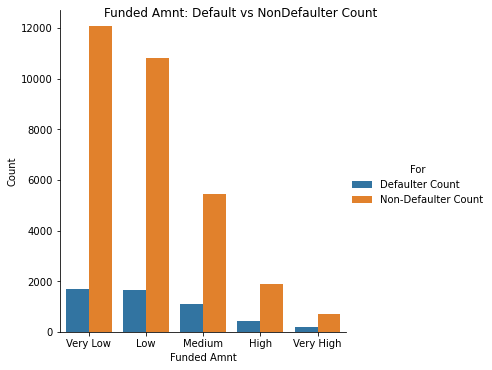

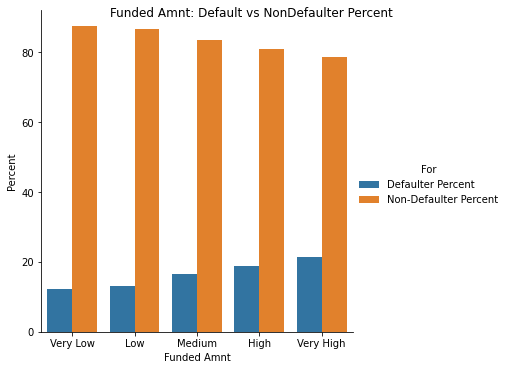

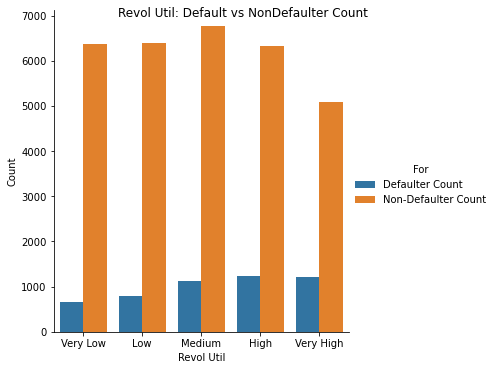

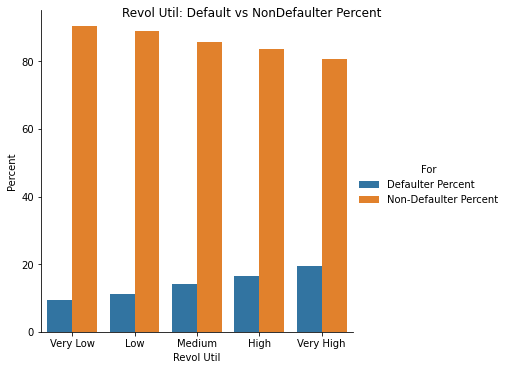

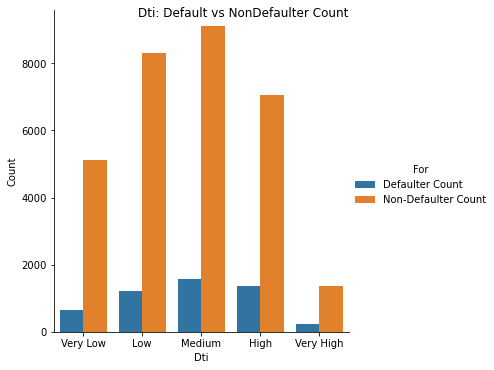

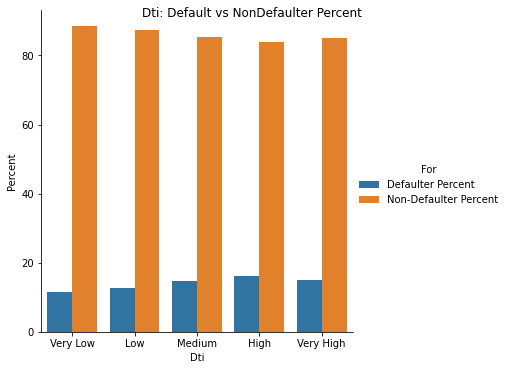

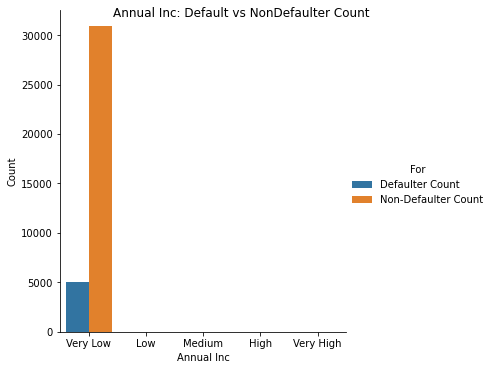

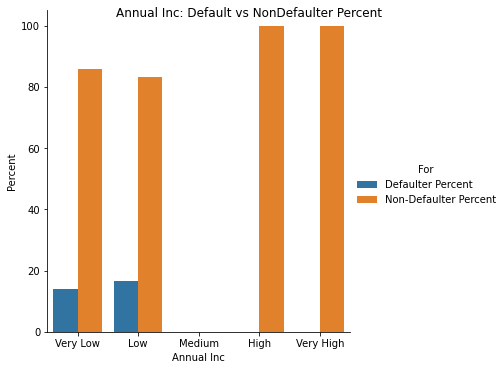

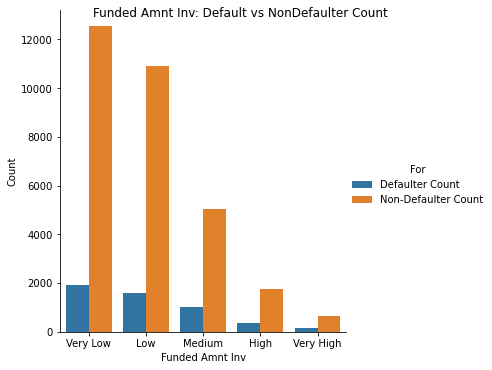

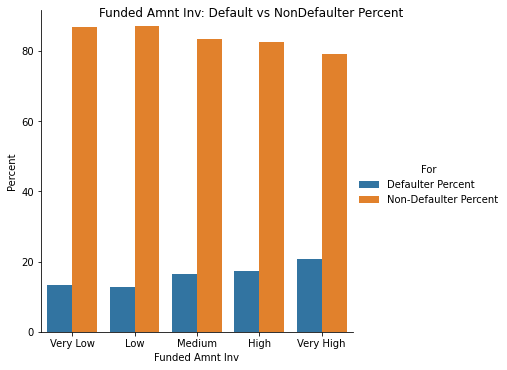

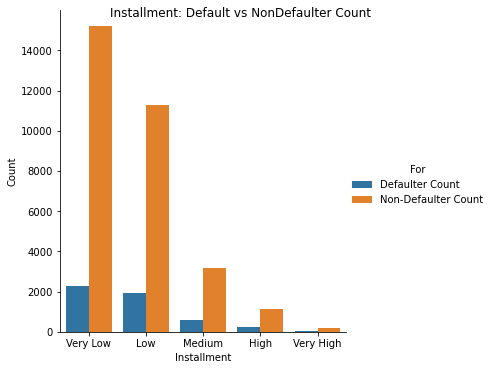

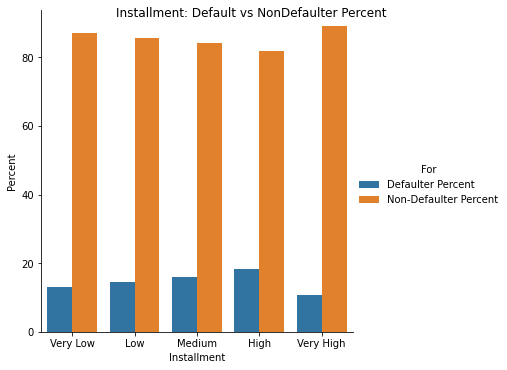

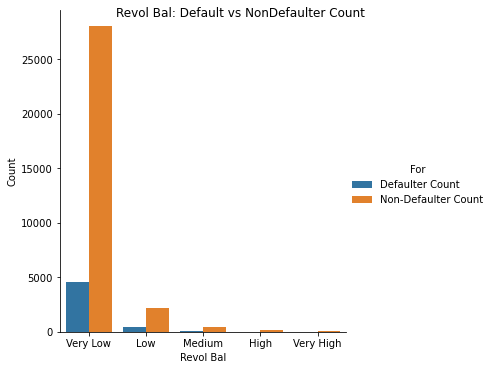

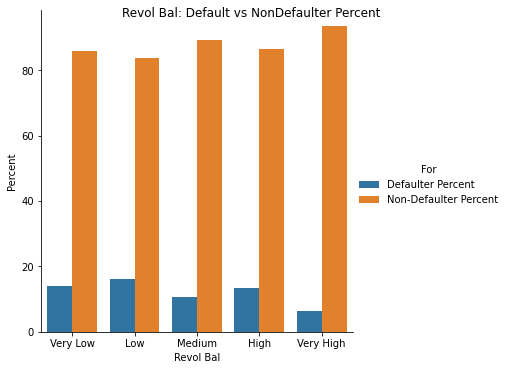

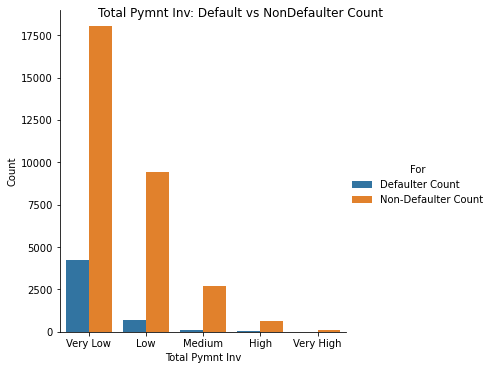

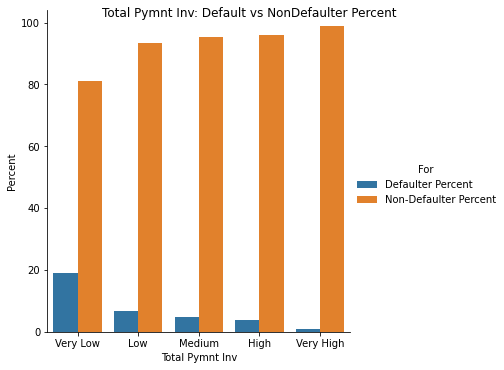

In [200]:


def plot_information_gain_stats():
    for k in stats_groups:
        clean_k = k.replace('_cat', '') if k.endswith("_cat") else k
        title_case = get_title(clean_k)
        count_title = title_case + ": Default vs NonDefaulter Count"
        percent_title = title_case + ": Default vs NonDefaulter Percent"
        v1: pd.DataFrame = stats_groups[k][[k, 'def_count', 'non_def']]
        v1.columns = [title_case, "Defaulter Count", "Non-Defaulter Count"]
        v1 = v1.melt(id_vars=title_case)
        v1.columns = [title_case, 'For', "Count"]
        # https://stackoverflow.com/questions/40877135/plotting-two-columns-of-dataframe-in-seaborn
        # https://medium.com/@yoonho0715/seaborn-factor-plot-params-2a3ed9cf71bc
        f = sns.factorplot(x=title_case, y='Count',
                           hue='For', data=v1, kind='bar')
        f.fig.suptitle(count_title, fontsize=12)
        # f.fig.set_size_inches((10, 10))

        v1: pd.DataFrame = stats_groups[k][[k, 'def_frac', 'non_def_frac']]
        v1['def_frac'] = (v1['def_frac']*100).round(2)
        v1['non_def_frac'] = (v1['non_def_frac']*100).round(2)
        v1.columns = [title_case, "Defaulter Percent", "Non-Defaulter Percent"]
        v1 = v1.melt(id_vars=title_case)
        v1.columns = [title_case, 'For', "Percent"]
        f = sns.factorplot(x=title_case, y='Percent',
                           hue='For', data=v1, kind='bar')
        f.fig.suptitle(percent_title, fontsize=12)
        # f.fig.set_size_inches((10, 10))

        plt.show()


plot_information_gain_stats()


In [201]:
info_gain_ser


int_rate_cat           0.339200
grade                  0.271537
home_ownership         0.191489
total_pymnt_inv_cat    0.178941
annual_inc_cat         0.166667
total_acc_cat          0.147497
inq_last_6mths_cat     0.120060
loan_amnt_cat          0.102276
revol_util_cat         0.098489
revol_bal_cat          0.097850
funded_amnt_cat        0.090299
funded_amnt_inv_cat    0.079718
installment_cat        0.074822
open_acc_cat           0.064502
dti_cat                0.048467
verification_status    0.041409
emp_length_cat         0.018692
dtype: float64